# **Dengue Fever Spread Prediction**

**1.0 Business Understanding**

**1.1 Introduction**

Dengue is a viral disease caused by the bite of a mosquito infected with any one of four; (DENV-1, DENV-2, DENV-3 and DENV-4) specific Dengue viruses.

Dengue virus is transmitted by female mosquitoes mainly of the species Aedes aegypti and, to a lesser extent, Ae. albopictus. These mosquitoes are also vectors of chikungunya, yellow fever and Zika viruses. Dengue is widespread throughout the tropics, with local variations in risk influenced by climate parameters as well as social and environmental factors.

**1.2 Problem Statement**

Dengue fever has been rampant majorly in subtropical areas. It affects everyone from the young to the old people, sometimes causing death. We venture into this research to find the major environmental factors that enhance the spread of Dengue fever per week in San Juan, Puerto Rico and Iquitos, Peru in order to give better insights on areas that are most affected and how to counter it.

Our goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. 


**1.3 Main Objectives**

Using environmental data collected by various U.S. Federal Government agencies, Predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru.

**1.4 Specific Objectives**

  1. Compare temperature changes during the year between the two cities.
  2. Compare precipitation distribution  between the two cities
  3. Compare Humidity change during the year between cities
  4. Find the number of infections per city accross the weeks of the year
  5. Find which week period that had the greatest spike of the infections


**1.5 Process**

The breakdown for how all these steps were executed in this stage is given below:

  1. Importing required libraries.

  2. Importing dataset.

  3. Data preprocessing.

  4. Explaratory Data Analysis.

  5. Splitting Dataset (Training and testing).

  6. Building and training model.

  7. Testing for accuracy.

  8. Prediction.

  **1.6 Columns Description**


*   precipitation_amt_mm – Total precipitation
*   city – City abbreviations: sj for San Juan and iq for Iquitos


*   week_start_date – Date given in yyyy-mm-dd format
*   station_max_temp_c – Maximum temperature


*   station_min_temp_c – Minimum temperature
*   station_avg_temp_c – Average temperature

*   station_precip_mm – Total precipitation
*   station_diur_temp_rng_c – Diurnal temperature range

*   reanalysis_sat_precip_amt_mm – Total precipitation
*   reanalysis_dew_point_temp_k – Mean dew point temperature

*   reanalysis_air_temp_k – Mean air temperature
*   reanalysis_relative_humidity_percent – Mean relative humidity

*   reanalysis_specific_humidity_g_per_kg – Mean specific humidity
*   reanalysis_precip_amt_kg_per_m2 – Total precipitation

*   reanalysis_max_air_temp_k – Maximum air temperature
*   reanalysis_min_air_temp_k – Minimum air temperature

*   reanalysis_avg_temp_k – Average air temperature
*   reanalysis_tdtr_k – Diurnal temperature range

*   ndvi_se – Pixel southeast of city centroid
*   ndvi_sw – Pixel southwest of city centroid

*   ndvi_ne – Pixel northeast of city centroid
*   ndvi_nw – Pixel northwest of city centroid



**1.7 Success Metrics**

We are going to use mean absolute error(MAE) as our accuracy score where a model with the lowest value will be selected.



















# **2.0 Loading the data**

**2.1 Loading libraries**

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np

#Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

**2.2 Loading the data**

In [ ]:
#Loading the datasets
df1 = pd.read_csv("dengue_features_train.csv",parse_dates=[3])
df2 = pd.read_csv("dengue_features_test.csv",parse_dates=[3])
df3 = pd.read_csv("dengue_labels_train.csv")

In [ ]:
#Previewing the dataset
df1.head()

city  year  ...  station_min_temp_c station_precip_mm
0   sj  1990  ...                20.0              16.0
1   sj  1990  ...                22.2               8.6
2   sj  1990  ...                22.8              41.4
3   sj  1990  ...                23.3               4.0
4   sj  1990  ...                23.9               5.8

[5 rows x 24 columns]

In [ ]:
#Previewing the top of labels dataset
df3.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [ ]:
#Previewing the first five entries of test set
df2.head()

city  year  ...  station_min_temp_c station_precip_mm
0   sj  2008  ...                21.7              75.2
1   sj  2008  ...                22.2              34.3
2   sj  2008  ...                22.8               3.0
3   sj  2008  ...                24.4               0.3
4   sj  2008  ...                23.3              84.1

[5 rows x 24 columns]

In [ ]:
#Viewing the shape of the datasets
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1456, 24)
(416, 24)
(1456, 4)


From the shapes of the datasets we note that the labels dataset has three columns similar to the training columns the only difference being the labels column. The test dataset is a holdout dataset from 2008 to 2010 where they do not overlap with the train dataset.

In [ ]:
#Merging the training dataset with the labels dataset on the the common
# columns that are city, year and week of the year
df = pd.merge(df1,df3)
df.head()

city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6

[5 rows x 25 columns]

In [ ]:
#Checking the shape of the new dataset
df.shape

(1456, 25)

# **3.0 Data cleaning**

**3.1 Checking for null Values**

In [ ]:
#Checking for null values
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

We note that we have null values from some columns.

In [ ]:
#Since this is majorly a climatical dataset we decide fill the null values with the values of the previous week.
#We choose this method because the climatical condition do not vary much week to week.
df.fillna(method='ffill', inplace=True)

In [ ]:
#Checking if there are any null values left
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
#Filling missing values in the test set
df2.fillna(method='ffill', inplace=True)
df2.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
#Checking the datatypes of various columns 
df.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

By checking datatypes,  all are in their correct formats apart from week start date column, so we change to datetime format

In [ ]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df2['week_start_date'] = pd.to_datetime(df2['week_start_date'])


In [ ]:
#Checking the changes
df.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

**3.2 Checking for duplicates**

In [ ]:
#Checking for duplicates
print(df.duplicated().any())
print(df2.duplicated().any())

False
False


There are no duplicated entries

In [ ]:
df.describe()


year   weekofyear  ...  station_precip_mm  total_cases
count  1456.000000  1456.000000  ...        1456.000000  1456.000000
mean   2001.031593    26.503434  ...          39.194162    24.675137
std       5.408314    15.019437  ...          47.363305    43.596000
min    1990.000000     1.000000  ...           0.000000     0.000000
25%    1997.000000    13.750000  ...           8.700000     5.000000
50%    2002.000000    26.500000  ...          23.800000    12.000000
75%    2005.000000    39.250000  ...          53.675000    28.000000
max    2010.000000    53.000000  ...         543.300000   461.000000

[8 rows x 23 columns]

In [ ]:
#Splitting the dataset into different cities
df_sj =df[df['city']=='sj']
df_iq = df[df['city'] == 'iq']
df_sj.head()
print(df_sj.shape)

(936, 25)


In [ ]:
#Checking unique values for year column 
df_sj['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [ ]:
#Checking the shape of iquitos city dataset
df_iq.head()
print(df_iq.shape)

(520, 25)


In [ ]:
#Finding the year spread for the year column in the Iquitos city dataset
df_iq['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

**3.3 Checking for outliers**

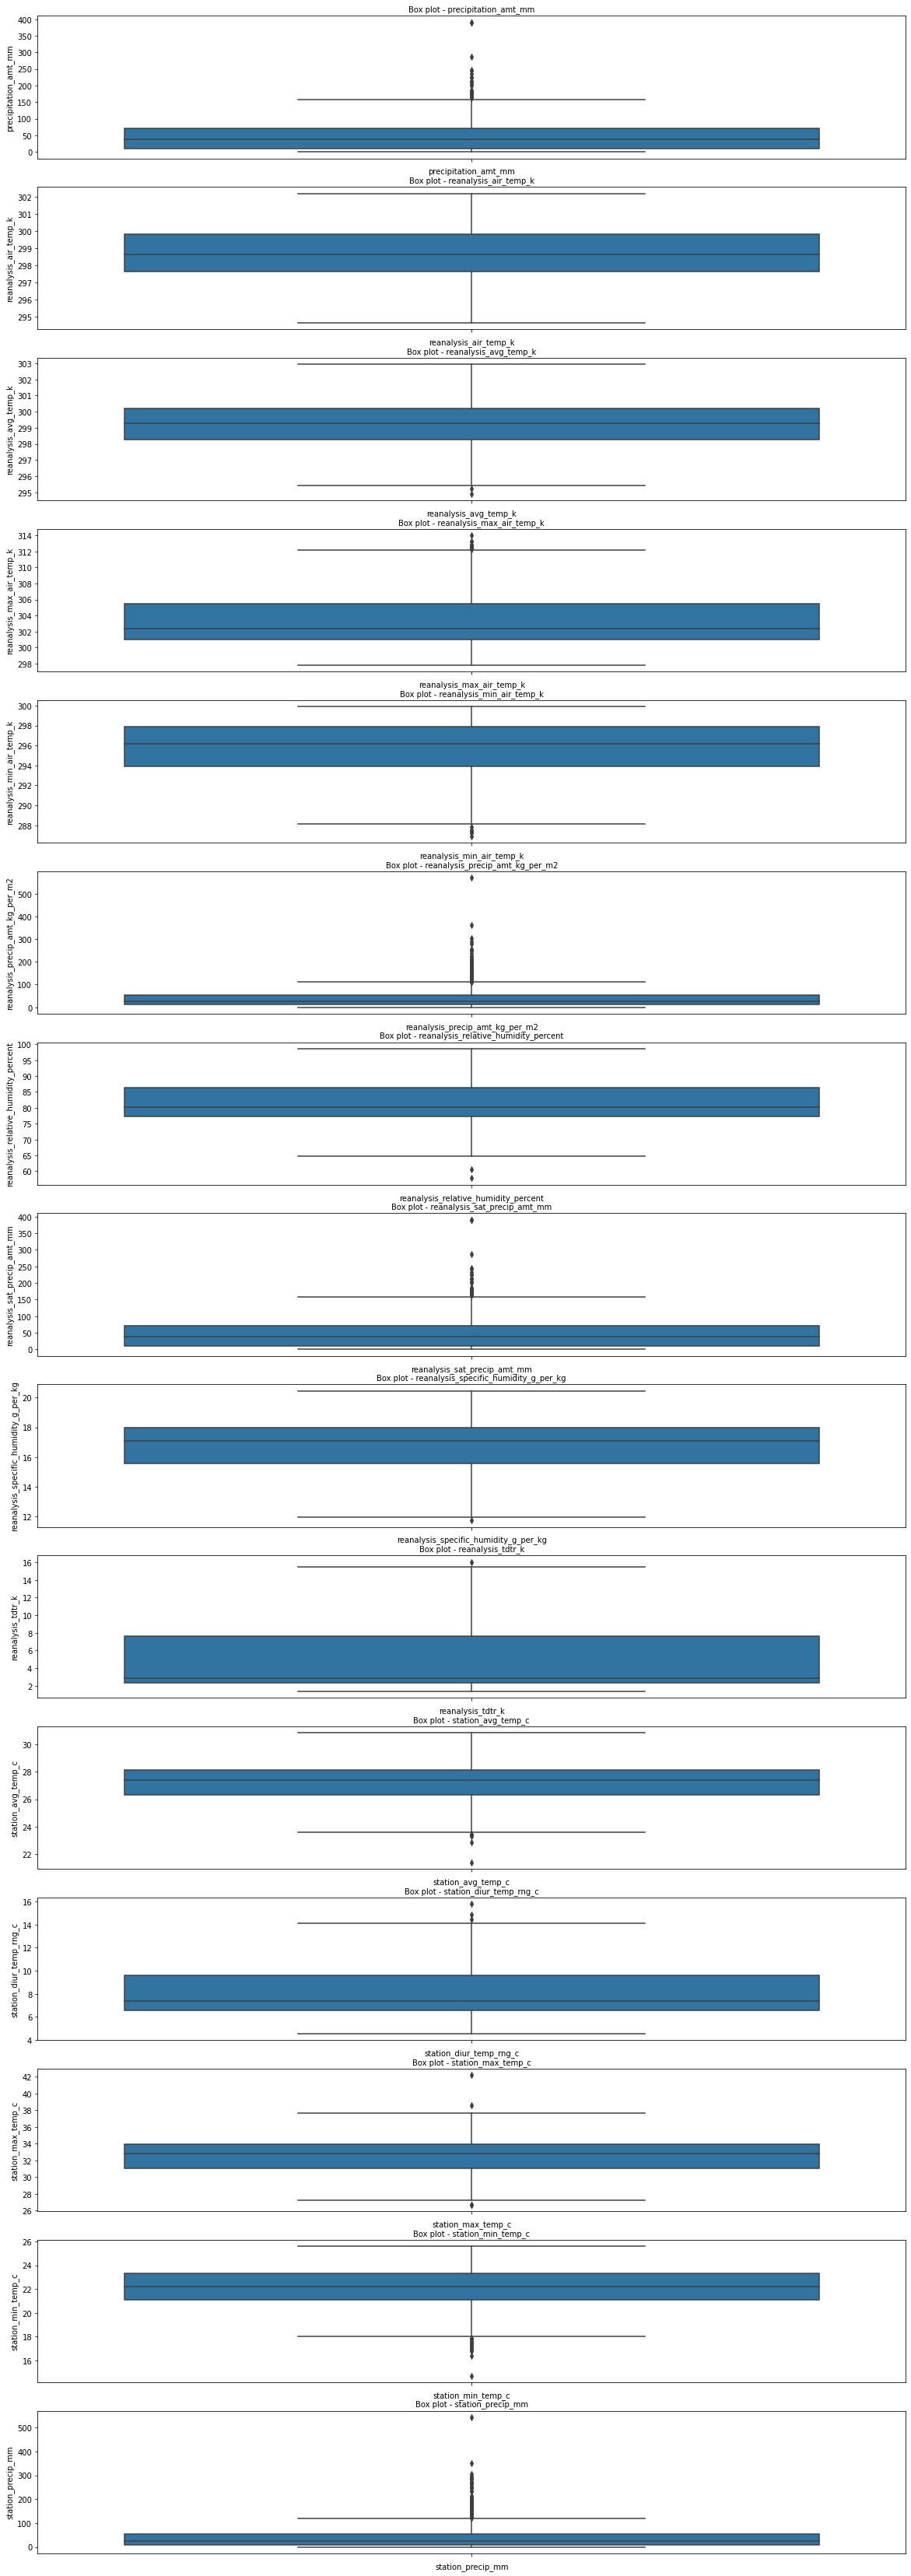

In [ ]:
#Plotting boxplots to detect outliers in the various columns

col_names = ['precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

fig,ax = plt.subplots(len(col_names),figsize=(20,60))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

We have outliers in some columns but since by dropping them we will missing a few weeks in some years.

# **4.0** **EXPLORATORY DATA ANALYSIS**

**4.1** **UNIVARIATE DATA ANALYSIS**

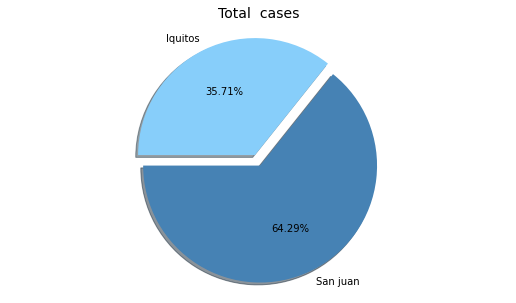

In [ ]:
#Viewing the ratio of total cases among the cities:
city = df['city'].value_counts()
city
# Existing Customers: 8500    Attrited/Lost Customer:  1627

#Visualizing the information on a pie chart:
labels= ['San juan','Iquitos']
colors=['steelblue', 'lightskyblue']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("Total  cases", size = 25, fontsize = fontsize)
plt.pie(city,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Since San Juan has a longer period of data collection we note that there are more entries from that city compared to Iquitos

Text(0.5, 1.0, 'Total cases in the cities')

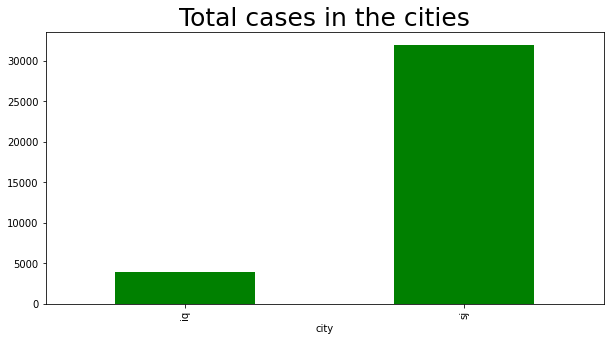

In [ ]:
#visualising the total number of cases in san juan and iquatos
plt.figure(figsize = (10,5))
fontsize = 14
table = df.groupby('city').sum()
table['total_cases'].plot(kind = 'bar',color = 'green')
plt.title("Total cases in the cities", size = 25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of precipitation in san juan ')

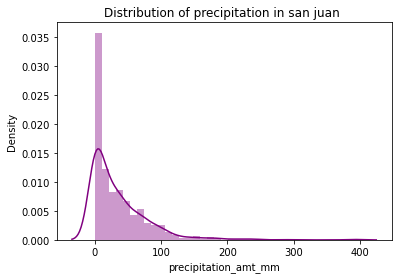

In [ ]:
# Plot for precipitation_amt_mm
sns.distplot(df_sj.precipitation_amt_mm, color= 'purple',  );
fontsize = 14
#Creating the labels for the plot
plt.title("Distribution of precipitation in san juan ")
#plt.xlabel("bins")
#plt.ylabel("Precipitation amount")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of precipitation in iquitos ')

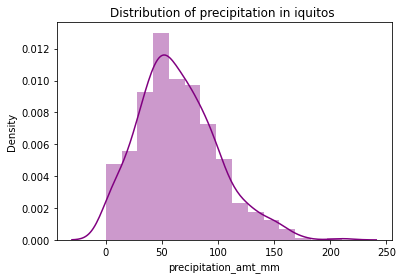

In [ ]:
# Plot for precipitation_amt_mm
sns.distplot(df_iq.precipitation_amt_mm, color= 'purple', bins = 15 );
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of precipitation in iquitos ")
#plt.xlabel("bins")
#plt.ylabel("Precipitation amount")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_avg_temp_k in iquitos')

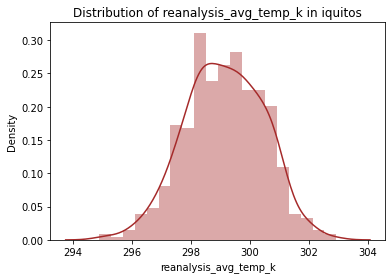

In [ ]:
# Plot for reanalysis_avg_temp_k

sns.distplot(df_iq.reanalysis_avg_temp_k , color= 'brown', bins=20);
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of reanalysis_avg_temp_k in iquitos")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_avg_temp_k")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_avg_temp_k in san juan')

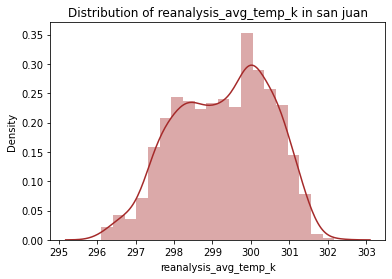

In [ ]:
# Plot for reanalysis_avg_temp_k
sns.distplot(df_sj.reanalysis_avg_temp_k , color= 'brown', bins=20);
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of reanalysis_avg_temp_k in san juan")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_avg_temp_k")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_specific_humidity_g_per_kg in san juan')

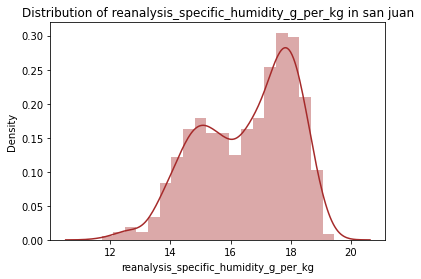

In [ ]:
# Plot for reanalysis_specific_humidity_g_per_kg
sns.distplot(df_sj.reanalysis_specific_humidity_g_per_kg , color= 'brown', bins=20);
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of reanalysis_specific_humidity_g_per_kg in san juan")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_specific_humidity_g_per_kg")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_specific_humidity_g_per_kg in iquatos')

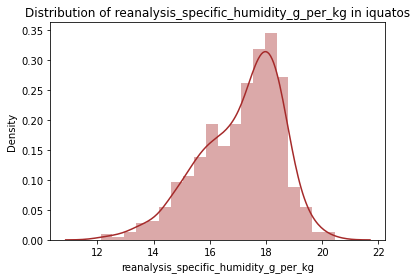

In [ ]:
# Plot for reanalysis_specific_humidity_g_per_kg
sns.distplot(df_iq.reanalysis_specific_humidity_g_per_kg , color= 'brown', bins=20);
fontsize = 14


#Creating the labels for the plot
plt.title("Distribution of reanalysis_specific_humidity_g_per_kg in iquatos")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_specific_humidity")

**4.2** **BIVARIATE ANALYSIS**

Text(0, 0.5, 'Total number of cases')

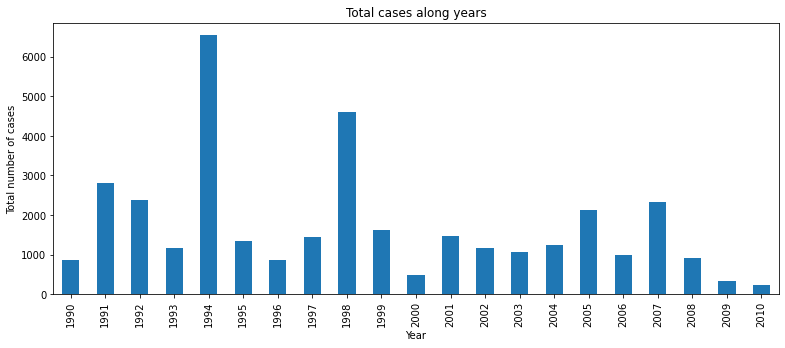

In [ ]:
#Visualizing Total Cases Per Year
x = df.groupby(['year']).sum().copy()
ax = x.total_cases.plot(kind='bar', figsize=(13, 5));

#Creating the labels for the plot
fontsize = 14
plt.title("Total cases along years")
plt.xlabel("Year")
plt.ylabel("Total number of cases")


The bar plots show that The most cases were recorded in 1994 with the least number of recordings being in the year 2010


Text(0, 0.5, 'Total number of cases')

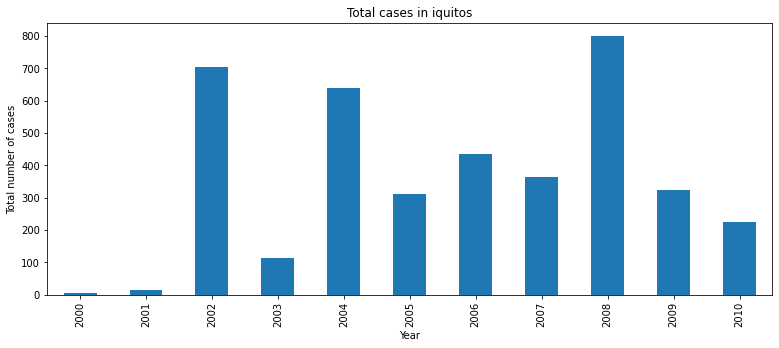

In [ ]:
#Visualizing Total Cases Per Year in iquatos
x = df_iq.groupby(['year']).sum().copy()
ax = x.total_cases.plot(kind='bar', figsize=(13, 5));

#Creating the labels for the plot
fontsize =  14
plt.title("Total cases in iquitos")
plt.xlabel("Year")
plt.ylabel("Total number of cases")

Dividing the dataset into different cities we note that cases for Iquitos city begun being recorded in 2000, where the number of cases having a peak in 2008 within recorded cases getting close to 800 with the least recordings being for the year 2000.

Text(0, 0.5, 'Total number of cases')

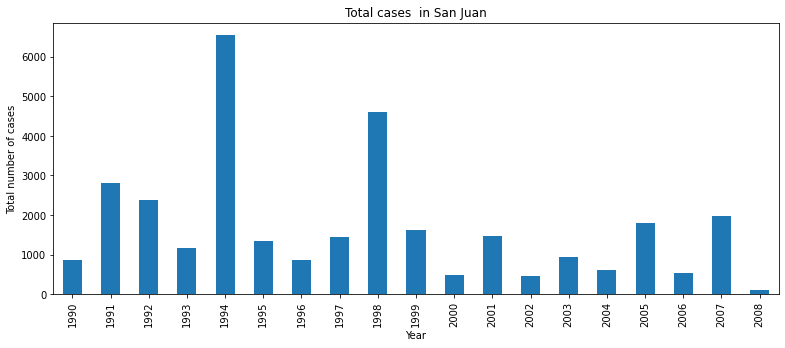

In [ ]:
#Visualizing Total Cases Per Year
x = df_sj.groupby(['year']).sum().copy()
ax = x.total_cases.plot(kind='bar', figsize=(13, 5));

#Creating the labels for the plot
fontsize = 14
plt.title("Total cases  in San Juan")
plt.xlabel("Year")
plt.ylabel("Total number of cases")

Total cases for San Juan city begun being recorded from 1990 to 2008 within cases recorded most in 1994 with least recordings being in the year 2008.

Text(0, 0.5, 'Total Precipitation in mm')

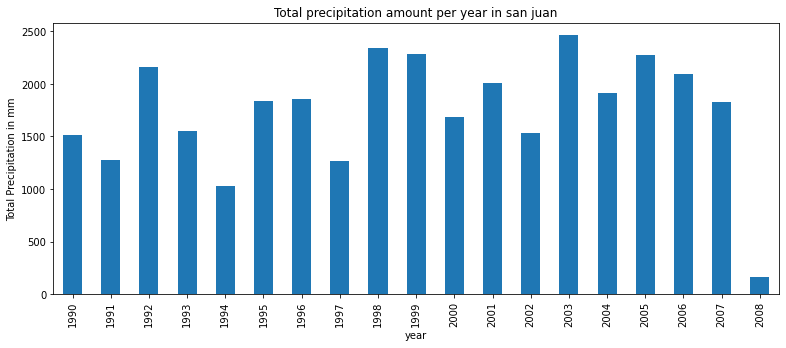

In [ ]:
#Creating a bar plot of the total precipitation distribution along the years
x = df_sj.groupby(['year']).sum().copy()
ax = x.precipitation_amt_mm.plot(kind='bar', figsize=(13, 5));

#Creating labels for the plot
fontsize = 14
plt.title("Total precipitation amount per year in san juan")
plt.xlabel("year")
plt.ylabel("Total Precipitation in mm")

Text(0, 0.5, 'Total Precipitation in mm')

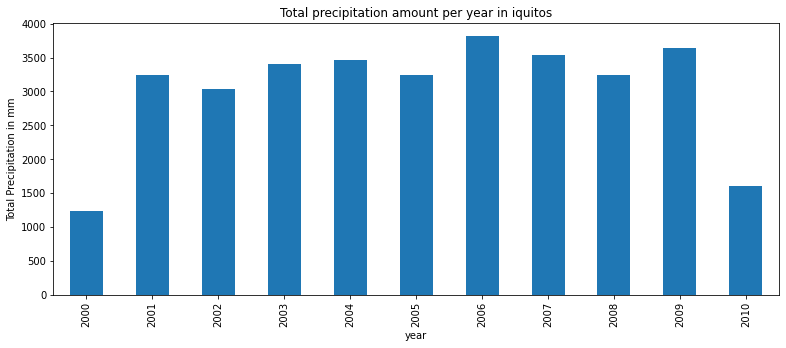

In [ ]:
#Creating a bar plot of the total precipitation distribution along the years in iquatos
x = df_iq.groupby(['year']).sum().copy()
ax = x.precipitation_amt_mm.plot(kind='bar', figsize=(13, 5));

#Creating labels for the plot
fontsize = 14
plt.title("Total precipitation amount per year in iquitos")
plt.xlabel("year")
plt.ylabel("Total Precipitation in mm")

Text(0, 0.5, 'Total Precipitation in mm')

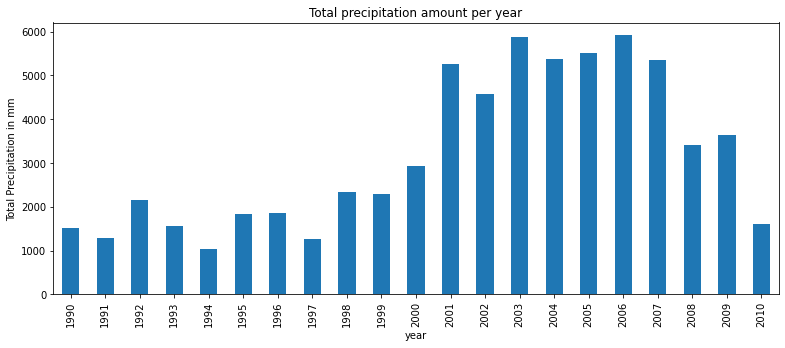

In [ ]:
#Creating a bar plot of the total precipitation distribution along the years
x = df.groupby(['year']).sum().copy()
ax = x.precipitation_amt_mm.plot(kind='bar', figsize=(13, 5));

#Creating labels for the plot
fontsize = 14
plt.title("Total precipitation amount per year")
plt.xlabel("year")
plt.ylabel("Total Precipitation in mm")

**Weather conditions**

As we can see from the list of weather features, there are a couple of overlapping features that we are using. such as:

  * precipitation_amt_mm, reanalysis_precip_amt_kg_per_m2,  reanalysis_sat_precip_amt_mm, and station_precip_mm all measure the rainfall in various ways

  * reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, and station_min_temp_c all measure various forms of the temperature.

  * reanalysis_relative_humidity_percent and reanalysis_specific_humidity_g_per_kg measure the humidity.

From that we can pick one from each category  and compare the change accross different weeks of the year.


In [ ]:
#Since the measurements of humidity, rainfall and temperature are different we are going to standardize them
from sklearn.preprocessing import StandardScaler

In [ ]:
# Selecting the three features to represent different weather conditions
df_sj_imp = df_sj[['station_avg_temp_c', 'precipitation_amt_mm', 'reanalysis_relative_humidity_percent' ]]
df_iq_imp = df_iq[[ 'station_avg_temp_c', 'precipitation_amt_mm', 'reanalysis_relative_humidity_percent' ]]

#Standardize San Juan
ss = StandardScaler()
Xs = ss.fit_transform(df_sj_imp[df_sj_imp.columns])
df_sj_s = pd.DataFrame(Xs, columns = df_sj_imp.columns, index=df_sj_imp.index)
df_sj_s['weekofyear'] = df_sj['weekofyear']

#Standardize IQ
ss = StandardScaler()
Xs = ss.fit_transform(df_iq_imp[df_iq_imp.columns])
df_iq_s = pd.DataFrame(Xs, columns = df_iq_imp.columns, index=df_iq_imp.index)
df_iq_s['weekofyear'] = df_iq['weekofyear']

Text(0.5, 0, 'Week of Year')

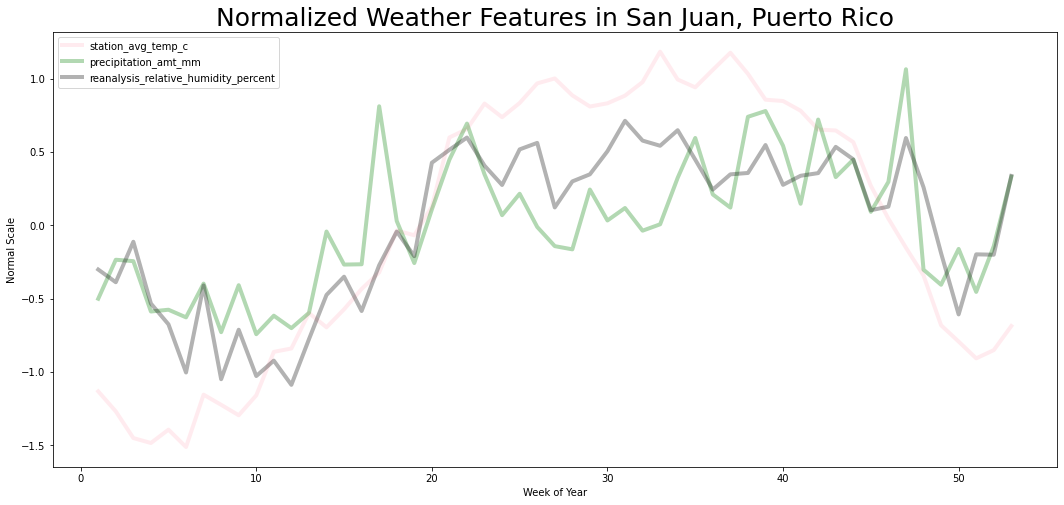

In [ ]:
#Plot all Normalized weather data in San Juan

#for i in (df_sj_s.columns[:-1]):
df_sj_s.groupby('weekofyear').mean()\
.plot(alpha = .3, figsize = (18, 8))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5))

from cycler import cycler 
default_cycler = (cycler(color=['#3B4CC0','#7C9FF9','#C0D4F5']) +
                  cycler(linestyle=['-', '-', '-']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

plt.legend(loc = 'best')
plt.title('Normalized Weather Features in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Text(0.5, 0, 'Week of Year')

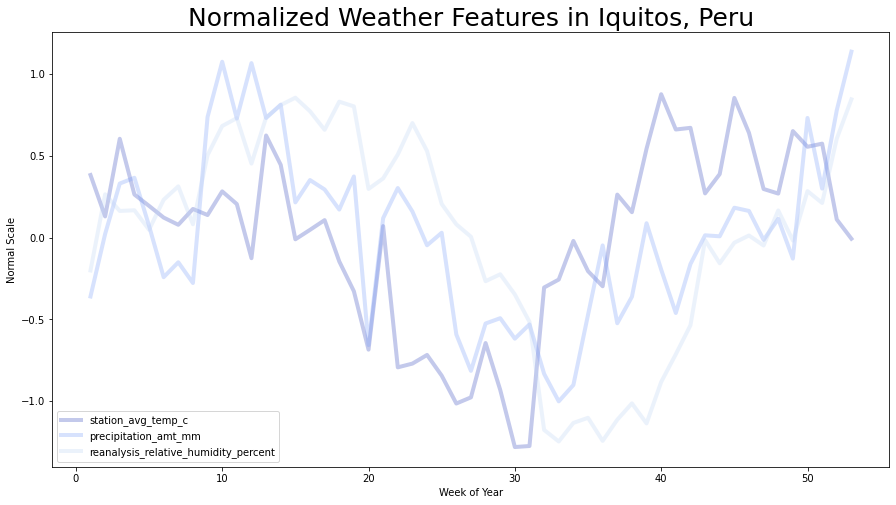

In [ ]:
#Plot all Normalized weather data in Iquitos

for i in (df_iq_s.columns[:-1]):
    df_iq_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (15, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))

from cycler import cycler 
default_cycler = (cycler(color=['#3B4CC0','#7C9FF9','#C0D4F5']) +
                  cycler(linestyle=['-', '-', '-']))

plt.legend(loc = 'best')
plt.title('Normalized Weather Features in Iquitos, Peru', size = 25)
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Each city follows a different trend (which makes sense, being in different hemispheres and climates).

**San Juan**: The first ten weeks tend to have lower values of the the weather conditions but later on they begin increasing steadily. We can say that the city is  Hot, Wet and Humid between the 20th and 40th week of the year compared to Iquitos.

**Iquitos**: Variaion. The weather features do not move as tightly as San Juan does. All three features tend to drop simultanously between week 20 and 30 then increase steadily after that. Also the temperature, humidity and precipitation features tend to be higher at the start of the year compared to San Juan.

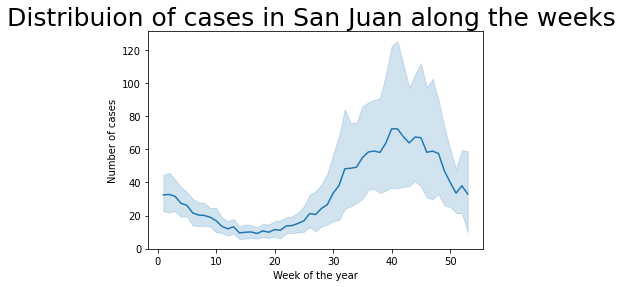

In [ ]:
#Plotting the distribution of cases across the months in san Juan
sns.lineplot(x="weekofyear", y="total_cases", data=df_sj)

#Creating labels for the line graph
plt.title("Distribuion of cases in San Juan along the weeks ", size = 25)
plt.xlabel("Week of the year")
plt.ylabel("Number of cases")

plt.show()

There is a drop in the number of cases from the first week till the twenthieth week, then there is an increase till the 40th week. Then the drop begins later in the weeks. This can be attributed to the fact that the city recieves more precipitation, has higher temperatures and more humidity which is a favourable condition for mosquitos. These same environmental conditions begin to drop later towards the end of the year resulting to a decrease in the number of cases recorded.

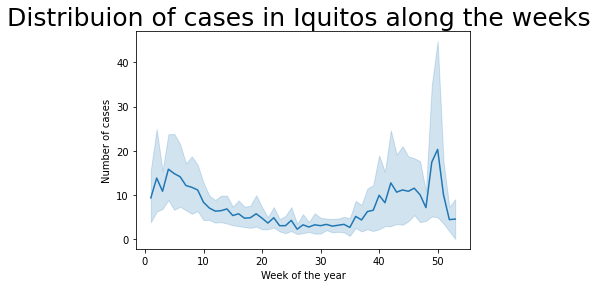

In [ ]:
sns.lineplot(x="weekofyear", y="total_cases", data=df_iq)

#Creating labels for the line graph
plt.title("Distribuion of cases in Iquitos along the weeks ", size = 25)
plt.xlabel("Week of the year")
plt.ylabel("Number of cases")

plt.show()

There is a notable drop in the cases as the year begins until towards the 35th week then the cases begin to increase until the 50th week then drops steadily. This can be as a result of the favourable  weather begining to drop from the tenth week until the 30th weeek then later on the environmental factors begin to become favourable for mosquito breeding that leads to more cases towards the end of the year.

Text(0, 0.5, 'Precipitation')

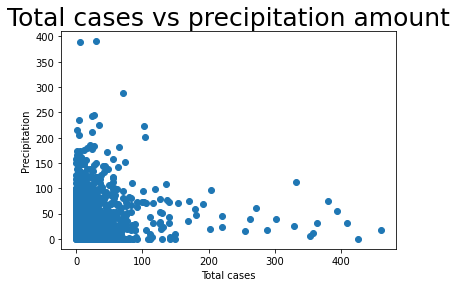

In [ ]:
#create scatterplot of total cases  vs. precipitation amount
plt.scatter(df['total_cases'], df['precipitation_amt_mm'])
plt.title('Total cases vs precipitation amount', size = 25)
plt.xlabel('Total cases')
plt.ylabel('Precipitation')

There seems to be a scenario where most cases are recorded with precipitation amounts lower than 200 mm.

Text(0, 0.5, 'Average temperature')

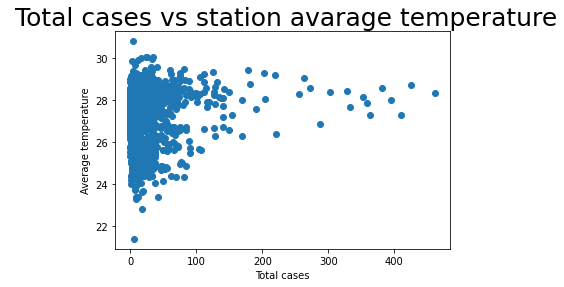

In [ ]:
#create scatterplot of total cases  vs. station average temperature
plt.scatter(df['total_cases'], df['station_avg_temp_c'])
plt.title(' Total cases vs station avarage temperature', size = 25)
plt.xlabel('Total cases')
plt.ylabel('Average temperature')

Majority of cases tend to be recorded when the average temperatures are above 24 degrees. This can be attributed to the fact that mosquitos need a warm environment to breed and to thrive in. 

**Feature change over time**

In [ ]:
# set index to the dates
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

In [ ]:
# create mean NVDI for each week for each city
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)

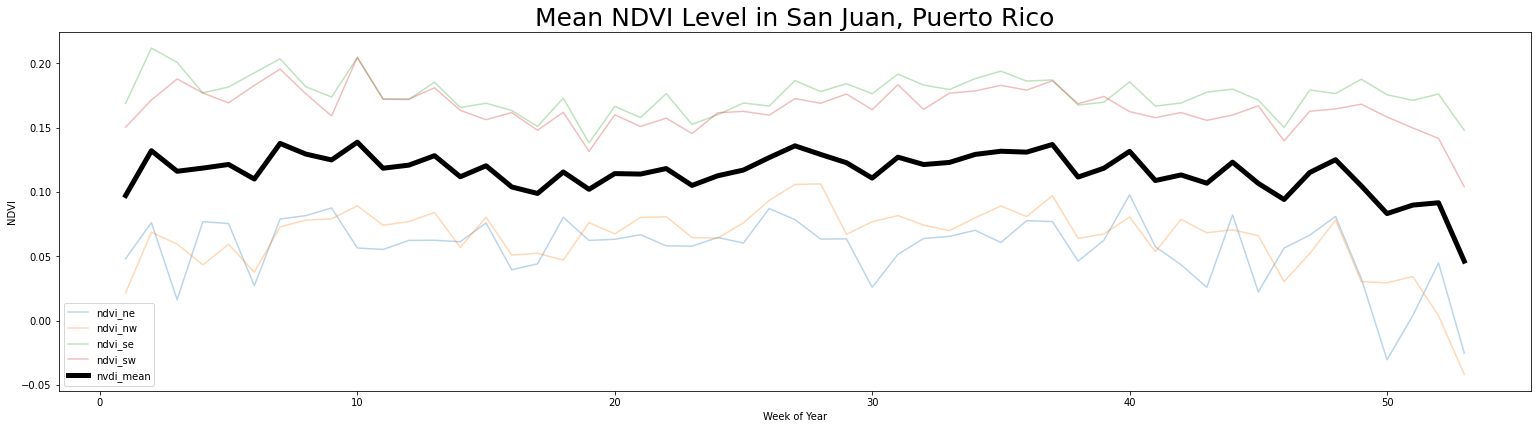

In [ ]:
# plot week by week and yearly average for San Juan
fig, ax = plt.subplots(figsize=(22, 12))
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_sj.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in San Juan, Puerto Rico', size = 25)
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
    
plt.tight_layout(pad=3)

**Plot week by week and yearly average for Iquitos**

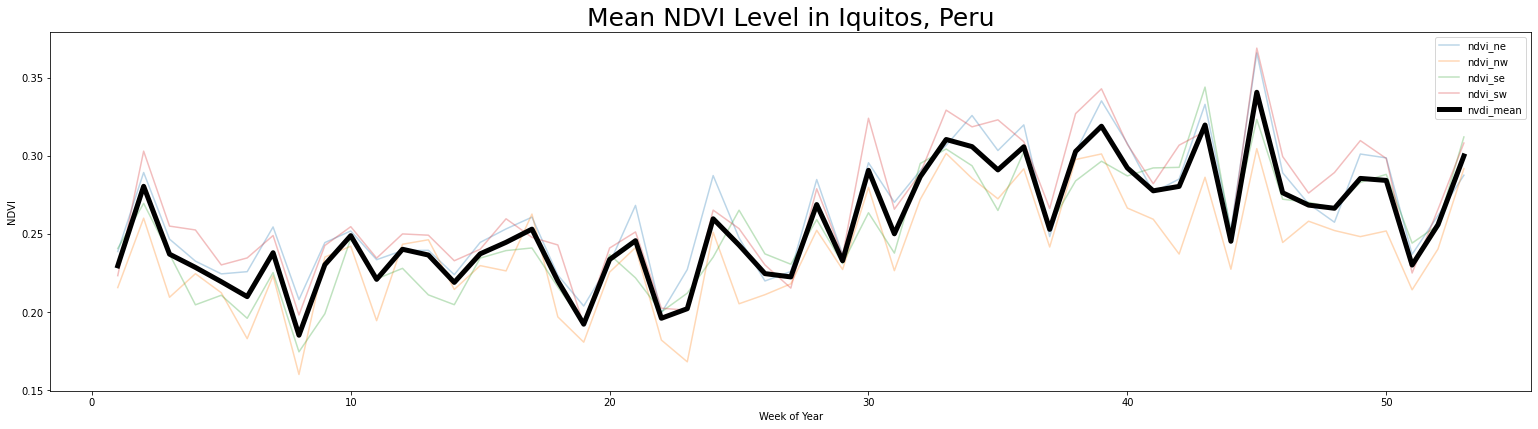

In [ ]:
# plot week by week and yearly average for Iquitos

fig, ax = plt.subplots(figsize=(22, 12))
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_iq.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_iq.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in Iquitos, Peru', size = 25)
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')


plt.tight_layout(pad=3)

**NVDI Feature Conclusions**

San Juan: The NVDI scores in the Southwest and Southeast are consistently lower than the scores of the Northwest and Northeast quadrants. After averaging the score at each week over the 10 years of data, we can see that the NVDI score remains fairly constant. There is a minor dip in the last 4 weeks of the year (December) that could be interesting. In addition, we can see the impact of the front fill method for data imputation. In 1995, there were a few missing rows of NVDI data. The flat line comes from repeating the last known value over and over until an observation was recorded again.

Iquitos: Iquitos shows a more homogenous NVDI score among its four quadrants. Visually, I can see an increase from Week 20 at 0.20 to Week 40 at 0.30 (May to October) in the NVDI scores .

In [ ]:
#Plotting separate correlation plot to see if there is  a difference 
sj = df_sj.drop(['city', 'year', 'weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw'],axis = 1)
iq = df_iq.drop(['city', 'year', 'weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw'],axis = 1)

Text(0.5, 1.0, 'Correlation plot among variables in Iquitos')

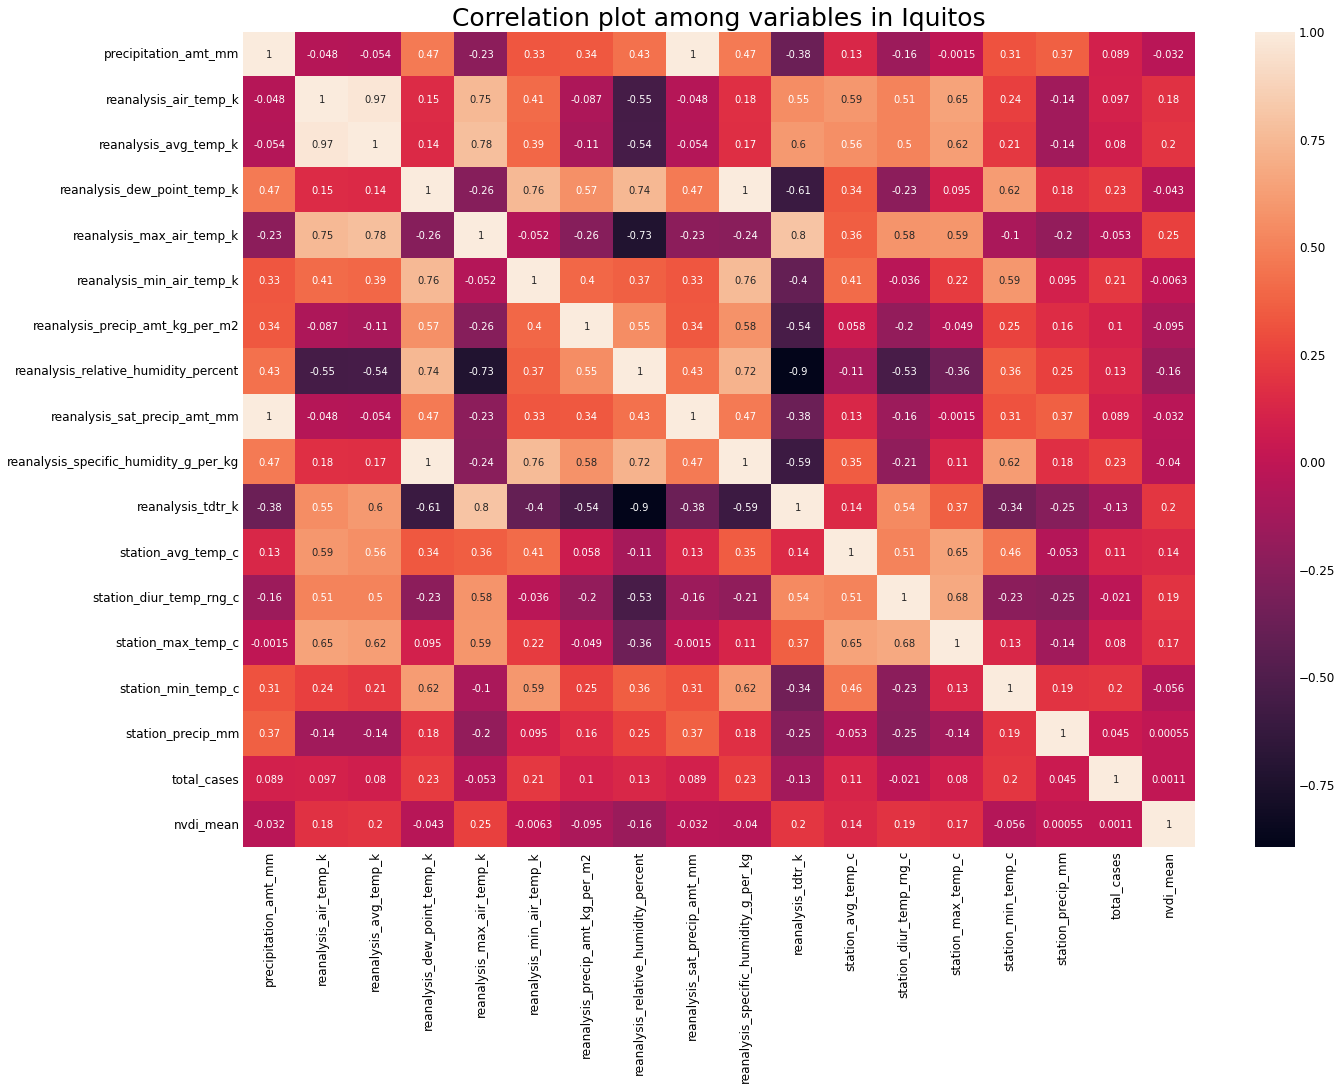

In [ ]:
#Correlation Plot for Iquitos
f = plt.figure(figsize=(19, 15))
sns.heatmap(iq.corr(), xticklabels = iq.corr().columns, yticklabels = iq.corr().columns, annot=True)
plt.title("Correlation plot among variables in Iquitos", size = 25)

From the correlation plots separately we notice that there are no distinct difference from the relationships when the cities are combined and when separated.

Text(0.5, 1.0, 'Correlation plot among variables in San Juan')

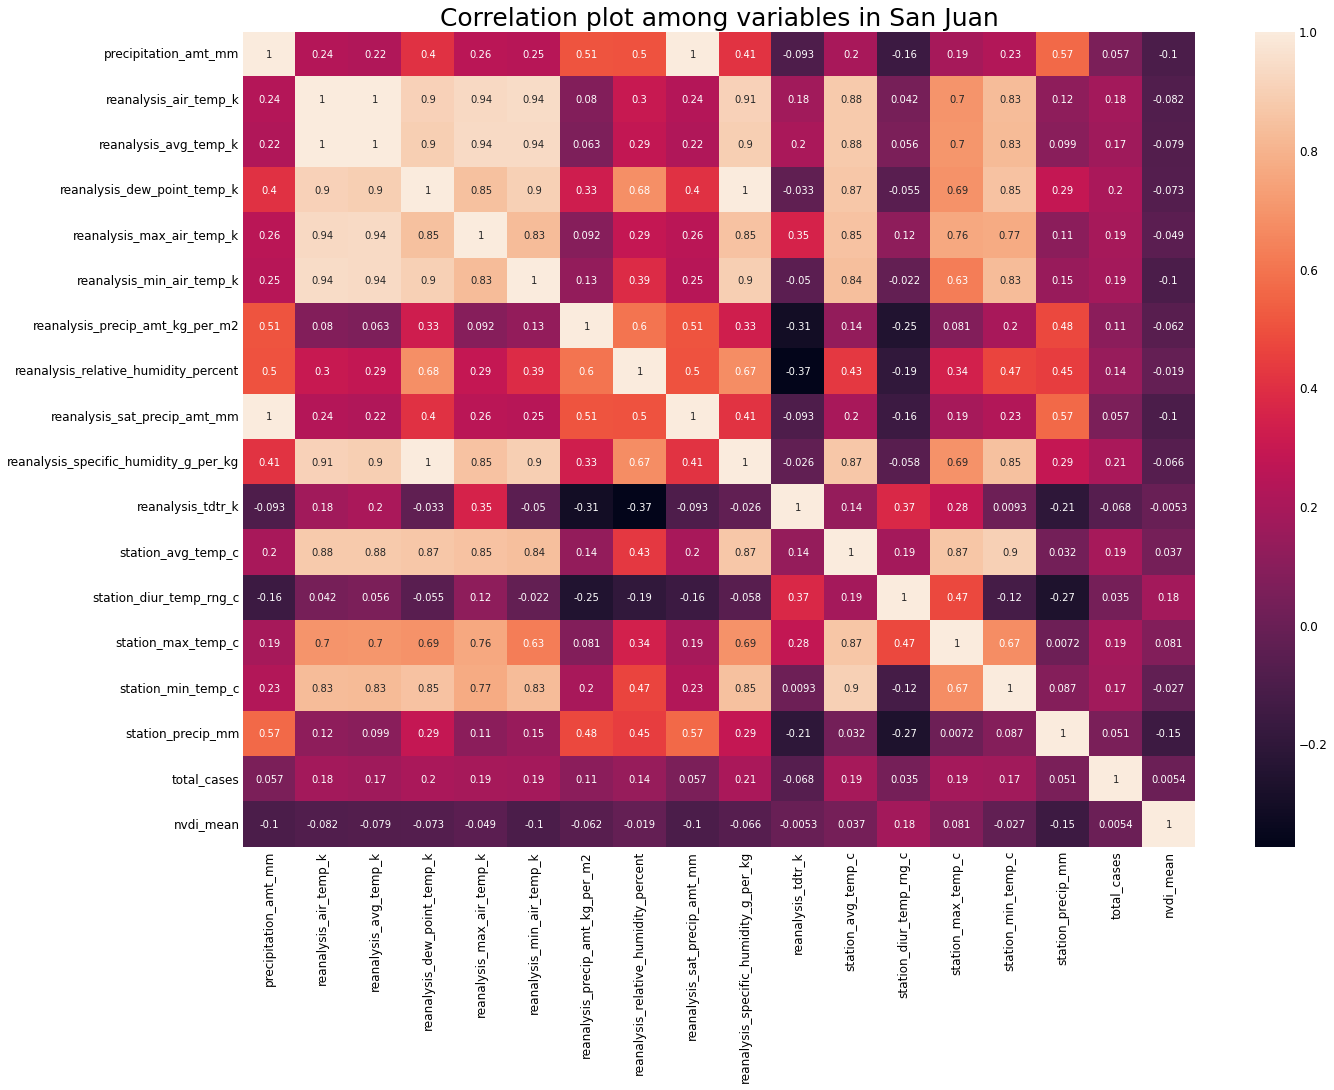

In [ ]:
#Correlation Plot for Iquitos
f = plt.figure(figsize=(19, 15))
sns.heatmap(sj.corr(), xticklabels = sj.corr().columns, yticklabels = iq.corr().columns, annot=True)
plt.title("Correlation plot among variables in San Juan", size = 25)

From the Correlation plot of the combined cities we note the following:
 * There are perfect positive correlations between some variables such as reanalysis precipitation amount and precipitation amount, reanalysis dew point and humidity, this means that they are displaying the same results so we are going to work with the one variable and drop the other one.

 * There is a strong positive correlation between minimum air temperature and average temperature.

 * Similarly there are strong positive correlations between
 reanalysis air humidity and reanalysis air temperature

**FEATURE ENGINEERING**

In [ ]:
# Encoding the categorical variables.

from sklearn.preprocessing import LabelEncoder
categ= ['city']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [ ]:
#Dropping the variables that do not contribute much to regression analysis
data_2 = df.drop(['year', 'week_start_date'], axis = 1)

**BORUTA TECHNIQUE**

In [ ]:
pip install Boruta

     |████████████████████████████████| 56 kB 2.3 MB/s 


In [ ]:
#Importing Boruta and other required libraries. 

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
#Loading the dataset, separating the features from the target variable, and 
#splitting the data into a train and a test set.

X = data_2.drop(['total_cases', 'city'], axis = 1)
y = data_2['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [ ]:
#Creating a baseline RandomForrestClassifier model with all the features.

rf_all_features = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
rf_all_features.fit(X_train, y_train) 

mean_absolute_error(y_test, rf_all_features.predict(X_test))

16.080084178524483

In [ ]:
#Creating a BorutaPy object with RandomForestClassifier as the estimator and ranking the features. 
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
I

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=69,
                                         random_state=RandomState(MT19937) at 0x7F2488DB9270),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F2488DB9270, verbose=2)

In [ ]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [ 1 14 10  1  1 16  7 12  4  5  1  8  6 17  3  2 12 15  1 10  9]
No. of significant features:  5


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

Feature  Ranking
0                              weekofyear        1
18                     station_max_temp_c        1
4                                 ndvi_sw        1
10              reanalysis_min_air_temp_k        1
3                                 ndvi_se        1
15                      reanalysis_tdtr_k        2
14  reanalysis_specific_humidity_g_per_kg        3
8             reanalysis_dew_point_temp_k        4
9               reanalysis_max_air_temp_k        5
12   reanalysis_relative_humidity_percent        6
6                   reanalysis_air_temp_k        7
11        reanalysis_precip_amt_kg_per_m2        8
20                      station_precip_mm        9
19                     station_min_temp_c       10
2                                 ndvi_nw       10
7                   reanalysis_avg_temp_k       12
16                     station_avg_temp_c       12
1                                 ndvi_ne       14
17                station_diur_temp_rng_c       15
5                    precipitation_amt_mm       16
13           reanalysis_sat_precip_amt_mm       17

In [ ]:
#Selecting the best features from boruta
boruta_df = data_2[['city','weekofyear', 'reanalysis_tdtr_k', 'reanalysis_min_air_temp_k', 'ndvi_sw', 'ndvi_se', 'total_cases']]

In [ ]:
#Previewing the features
boruta_df.head()

city  weekofyear  reanalysis_tdtr_k  ...   ndvi_sw   ndvi_se  total_cases
0     1          18           2.628571  ...  0.177617  0.198483            4
1     1          19           2.371429  ...  0.155486  0.162357            5
2     1          20           2.300000  ...  0.170843  0.157200            4
3     1          21           2.428571  ...  0.235886  0.227557            3
4     1          22           3.014286  ...  0.247340  0.251200            6

[5 rows x 7 columns]

In [ ]:
#Checking the shape of the dataset
boruta_df.shape

(1456, 7)

**SUPERVISED LEARNING**

**DECISION TREES**

In [ ]:
#Dropping the year column
#df1 = df.drop(['year'], axis = 1)
df1 = df.drop(['week_start_date'], axis = 1)

In [ ]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=lda_best.drop(['total_cases'],axis = 1)
y=lda_best['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=1, verbose=1, scoring = "neg_mean_absolute_error")

In [ ]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best Min_samples:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('best_score',best_clf.best_score_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Max_depth: 3
Best Min_samples: 5
best_score -17.100713424806727


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree classifier

tree = DecisionTreeRegressor(max_depth=5, min_samples_split=5,random_state=0)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
lda_feat = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 17.002275593389314
MSE 1213.933855024853
RMSE 34.841553567900114
RMSLE 3.550810742491282
0.30012307588121023


**USING BEST FEATURES**

In [ ]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=1, verbose=1, scoring = "neg_mean_absolute_error")

In [ ]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best Min_samples:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('best_score',best_clf.best_score_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Max_depth: 5
Best Min_samples: 5
best_score -16.929395095341143


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree classifier

tree = DecisionTreeRegressor(max_depth=5, min_samples_split=5,random_state=0)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
tree_best_features = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 17.279403665167422
MSE 1072.2105179279347
RMSE 32.7446257869583
RMSLE 3.48873885050755
0.38183172321209047


**RANDOM FOREST REGRESSOR**

In [ ]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [ ]:
# Finding the best parameters.
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
params = {'bootstrap': [True, False],
 'max_depth': [5, 10, 15],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 "n_estimators":[100,500]
}

grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=3, n_jobs=1, verbose=1, scoring = "neg_mean_absolute_error")

In [ ]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)

print('Best bootstrap:', best_clf.best_estimator_.get_params()['bootstrap'])
print('Best min_samples_leaf:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_clf.best_estimator_.get_params()['max_features'])
print('Best n_estimators:', best_clf.best_estimator_.get_params()['n_estimators'])
print('best_score',best_clf.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best bootstrap: False
Best min_samples_leaf: 2
Best Max_depth: 5
Best max_features: sqrt
Best n_estimators: 100
best_score -16.00489427476145


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Initiating the random forest regressor:
Forest = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 2, random_state=42, max_depth=10)

#Fitting the model:
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Forest.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

random_forest = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 16.754499565799442
MSE 866.104682287343
RMSE 29.429656509842975
RMSLE 3.382002890748217
0.5006592175553609


**LIGHT GBM**

In [ ]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [ ]:
#parameter tuning
from lightgbm import LGBMRegressor
lg = LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [100,200]
             }
search = GridSearchCV(estimator=lg, n_jobs=-1, param_grid=param_dist, cv = 10, scoring="neg_mean_squared_error", verbose=5)

In [ ]:
#finding the best parametres
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
{'learning_rate': 0.05, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 300}


1032.4404903473708

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(learning_rate=0.1,max_depth=50,n_estimators = 100, random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='neg_mean_absolute_error')

[20]	training's l2: 813.61	valid_0's l2: 1037.15
[40]	training's l2: 550.546	valid_0's l2: 992.803
[60]	training's l2: 419.371	valid_0's l2: 983.883
[80]	training's l2: 326.215	valid_0's l2: 996.663
[100]	training's l2: 261.245	valid_0's l2: 989.63


LGBMRegressor(max_depth=50, random_state=42)

In [ ]:
#Creating a prediction from the model
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
lgbm = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 18.403265547855604
MSE 989.6300579743978
RMSE 31.4583861311161
RMSLE 3.4486655972397853
0.4294423554268194


**XG BOOST**

In [ ]:
from xgboost import XGBRegressor

#fitting Xgboost without parameter tuning
#we fit the model using the parameters
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
#making prediction
y_pred = xgb.predict(X_test)

[09:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
xgboost = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 16.34631131906531
MSE 791.7894163499765
RMSE 28.13875292812346
RMSLE 3.3371477340064133
0.5435046654551965


In [ ]:
#Model Comparison:
Models =  pd.DataFrame({'Model': ['Decision Tree', 'Decision Tree Best Features', ' Random Forest', 'Light GBM', 'XG BOOST'],
                               
                     'Mean Absolute Error': [lda_feat, tree_best_features, random_forest, lgbm, xgboost]})
Models.sort_values(by = 'Mean Absolute Error', ascending = True)

Model  Mean Absolute Error
4                     XG BOOST            16.346311
2                Random Forest            16.754500
0                Decision Tree            17.002276
1  Decision Tree Best Features            17.279404
3                    Light GBM            18.403266

**TIME SERIES**

In [ ]:
ts = df[['week_start_date', 'total_cases']]

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
ts = ts.sort_values('week_start_date')
ts.head()

week_start_date  total_cases
0      1990-04-30            4
1      1990-05-07            5
2      1990-05-14            4
3      1990-05-21            3
4      1990-05-28            6

In [ ]:
ts.isnull().sum()

week_start_date    0
total_cases        0
dtype: int64

In [ ]:
ts.describe()

total_cases
count  1456.000000
mean     24.675137
std      43.596000
min       0.000000
25%       5.000000
50%      12.000000
75%      28.000000
max     461.000000

In [ ]:
ts = ts.set_index('week_start_date')
ts.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2010-04-23', '2010-04-30', '2010-05-07', '2010-05-14',
               '2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25'],
              dtype='datetime64[ns]', name='week_start_date', length=1456, freq=None)

In [ ]:
y = ts['total_cases'].resample('M').mean()
y['2000':]

week_start_date
2000-01-31    18.40
2000-02-29     6.75
2000-03-31     4.00
2000-04-30     2.00
2000-05-31     1.00
              ...  
2010-02-28    14.25
2010-03-31    12.25
2010-04-30     6.20
2010-05-31     5.00
2010-06-30     3.50
Freq: M, Name: total_cases, Length: 126, dtype: float64

In [ ]:
ts.isnull().sum()

total_cases    0
dtype: int64

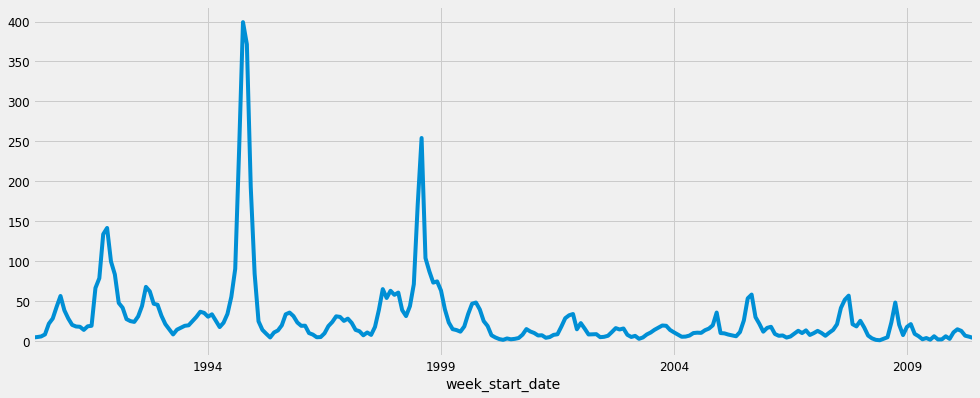

In [ ]:
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern

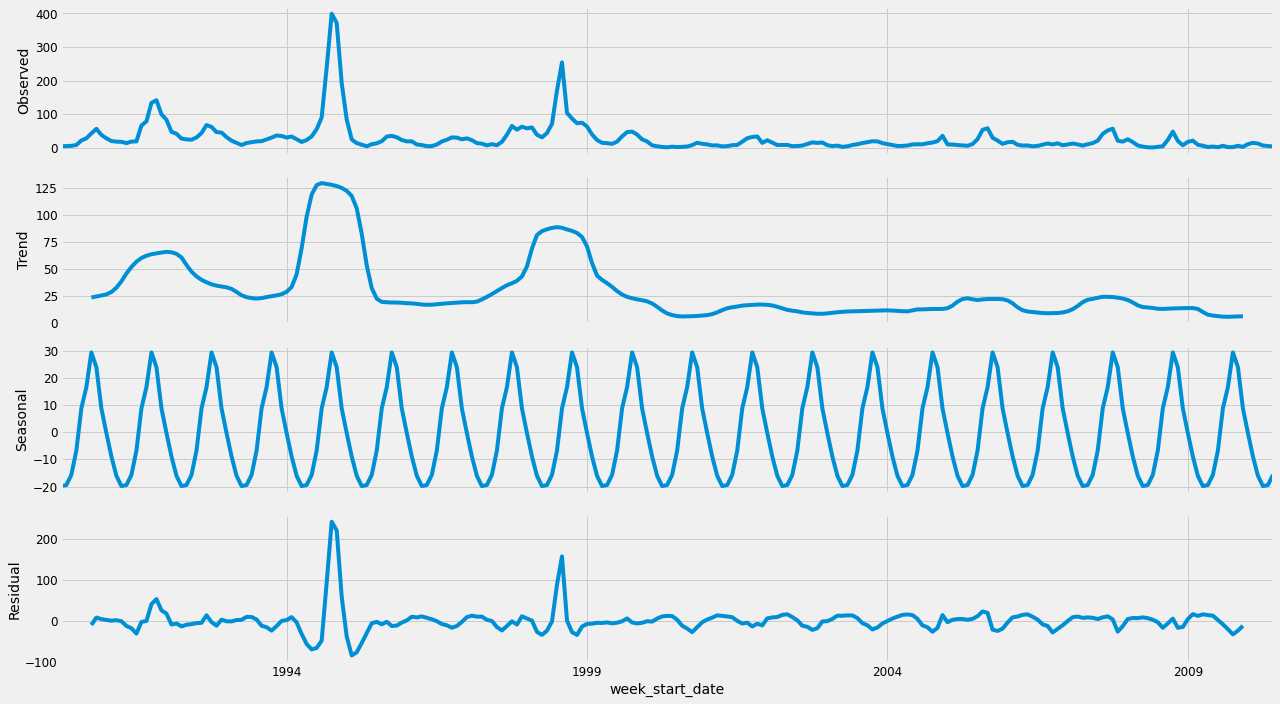

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()



To check Stationary 


Before difference mean and Variance

mean1 = 37.259615 ,mean2 = 12.090659
var1 = 3096.341035 ,var2 = 390.321893


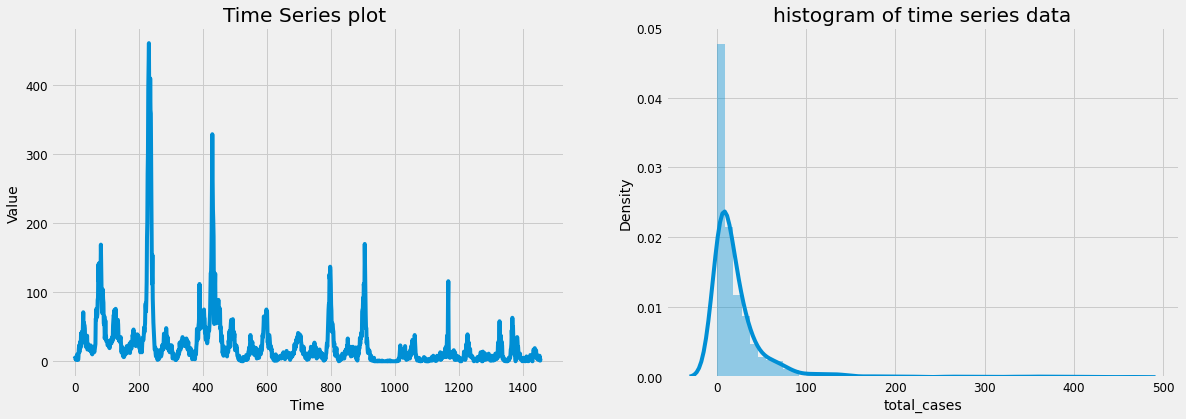

In [ ]:
import seaborn as sns
#taking half length of data
split = round(len(df['total_cases'])/2)
# split two part of time series data 
X1,X2 = df['total_cases'][0:split],df['total_cases'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['total_cases'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['total_cases'],ax =ax[1])

**AUGMENTED DICKEY FULLER  TEST  (ADF)**

NULL HYPOTHESIS: Time series = non-stationary

ALTERNATIVE HYPOTHESIS: Time series = stationary

Reject the null hypothesis if p_value is less than critical value at 5% 

In [ ]:
# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller
 
 
# extracting only the total cases count using values function
values = ts.total_cases
 
# passing the extracted total cases count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -6.306606
p-value: 0.000000
critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Since 0  is less than 0.05 we reject the null hypothesis and state that our time series is stationary.

**KWIAKOSKI-PHILLIPS-SCHMIDT-SHIN(KPSS TEST)**

NULL HYPOTHESIS: time series = stationary 

ALTERNATIVE HYPOTHESIS: time series = non-stationary

Reject null hypothesis if p_value is less than critical value at 5% 


In [ ]:
from statsmodels.tsa.stattools import kpss
t_stat, p_value, _, critical_values = kpss(ts['total_cases'].values)

print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 0.97
Critial Values:
   10%, 0.35
Critial Values:
   5%, 0.46
Critial Values:
   2.5%, 0.57
Critial Values:
   1%, 0.74

p-value: 0.01
Non-Stationary


Since 0.01 is less than 0.05 we reject the null hypothesis and state that our time series is non stationary

By using both test and finding different conclusion, we can conclude that our time series is difference stationary basing on the following case scenarios:

**Case 1**: Both tests conclude that the series is not stationary - The series is not stationary

**Case 2**: Both tests conclude that the series is stationary - The series is stationary

**Case 3**: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

**Case 4**: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

**AUTO REGRESSIVE INTREGRATED MOVING AVERAGE (ARIMA)**

**Subsettting and Indexing**

In [ ]:
ts.head()

total_cases
week_start_date             
1990-04-30                 4
1990-05-07                 5
1990-05-14                 4
1990-05-21                 3
1990-05-28                 6

In [ ]:
df_sj =df[df['city']=='sj']

df_iq = df[df['city'] == 'iq']

df_sj.head()

print(df_sj.shape)

(0, 25)


In [ ]:
df_sj = df_sj.drop(['city','year'],axis = 1)
df_iq = df_iq.drop(['city','year'],axis = 1)

In [ ]:
#create month variable
df_sj['month'] = df_sj['week_start_date'].dt.month
df_iq['month'] = df_iq['week_start_date'].dt.month


# train test split
#sj
sj_train = df_sj.loc[:'2007-04-20']
sj_Xtrain = sj_train.drop('total_cases', axis = 1)
sj_ytrain = sj_train[['total_cases']]

sj_test = df_sj.loc['2007-04-20':]
sj_Xtest = sj_test.drop('total_cases', axis = 1)
sj_ytest = sj_test[['total_cases']]

#iq
iq_train = df_iq.loc[:'2009-06-20']
iq_Xtrain = iq_train.drop('total_cases', axis = 1)
iq_ytrain = iq_train[['total_cases']]

iq_test = df_iq.loc['2009-06-20':]
iq_Xtest = iq_test.drop('total_cases', axis = 1)
iq_ytest = iq_test[['total_cases']]

**ARIMA**

In [ ]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_sj = df.set_index('week_start_date')
df_sj.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2010-04-23', '2010-04-30', '2010-05-07', '2010-05-14',
               '2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25'],
              dtype='datetime64[ns]', name='week_start_date', length=1456, freq=None)

In [ ]:
y = df_sj['total_cases'].resample('W').mean()
y['2000':]

week_start_date
2000-01-02    17.0
2000-01-09    16.0
2000-01-16    23.0
2000-01-23    18.0
2000-01-30    18.0
              ... 
2010-05-30     5.0
2010-06-06     8.0
2010-06-13     1.0
2010-06-20     1.0
2010-06-27     4.0
Freq: W-SUN, Name: total_cases, Length: 548, dtype: float64

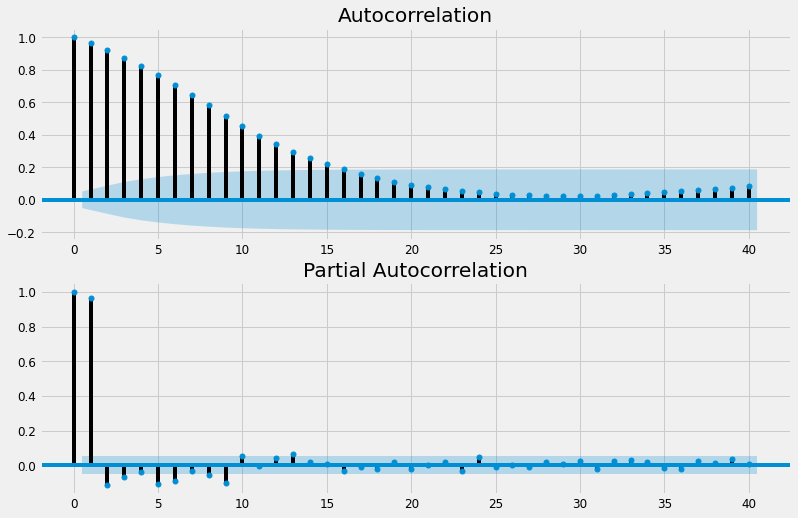

In [ ]:
#Checking for corelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sj['total_cases'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_sj['total_cases'].dropna(),lags=40,ax=ax2)

#We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.


To check Stationary 


Before difference mean and Variance

mean1 = 37.259615 ,mean2 = 12.090659
var1 = 3096.341035 ,var2 = 390.321893


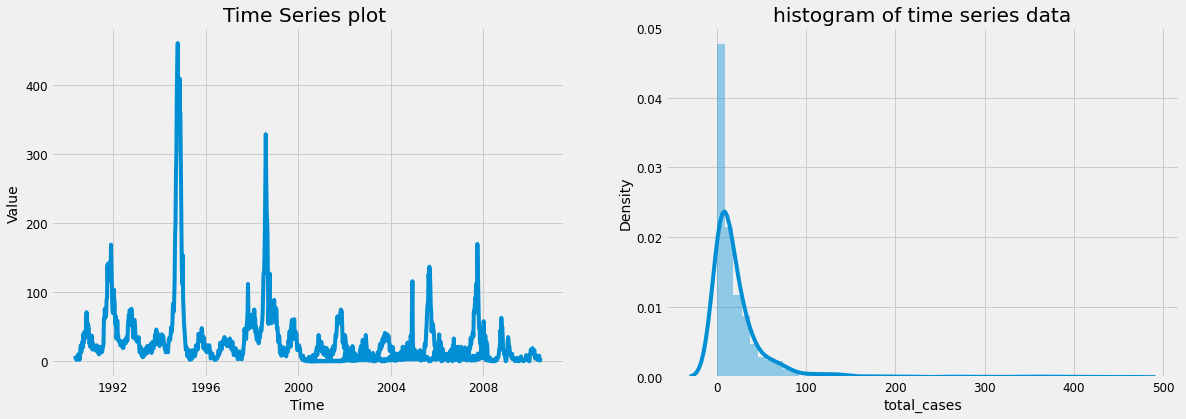

In [ ]:
import seaborn as sns
#taking half length of data
split = round(len(df_sj['total_cases'])/2)
# split two part of time series data 
X1,X2 = df_sj['total_cases'][0:split],df_sj['total_cases'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df_sj['total_cases'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df_sj['total_cases'],ax =ax[1])

In [ ]:
df_sj.head()

city  ... total_cases
week_start_date        ...            
1990-04-30          1  ...           4
1990-05-07          1  ...           5
1990-05-14          1  ...           4
1990-05-21          1  ...           3
1990-05-28          1  ...           6

[5 rows x 24 columns]

In [ ]:
df_sj = df[['week_start_date','total_cases']]

In [ ]:
df_sj = df_sj.set_index('week_start_date')


In [ ]:
#Drop null values from month column.
#df_sj.dropna(subset = ["week_start_date"], inplace=True)

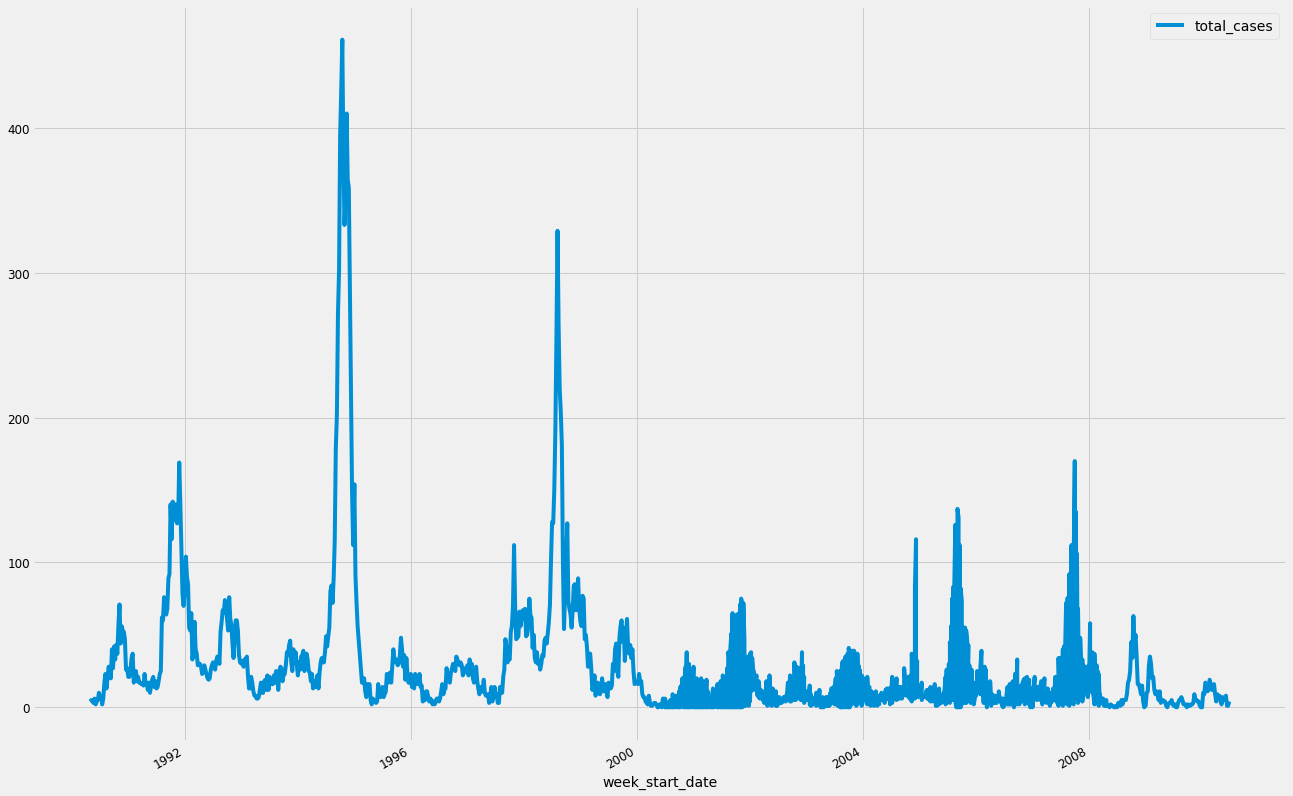

In [ ]:
df_sj.plot(figsize=(20, 15))

**ARIMA  SAN_JUAN**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# 1,1,2 ARIMA Model
model =ARIMA(df_sj.total_cases, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                 1455
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5655.661
Method:                       css-mle   S.D. of innovations             11.800
Date:                Tue, 01 Mar 2022   AIC                          11317.321
Time:                        09:34:48   BIC                          11333.170
Sample:                             1   HQIC                         11323.234
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0002      0.334      0.001      0.999      -0.655       0.656
ma.L1.D.total_cases     0.0812      0.025      3.261      0.001       0.032       0.130
                


Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance)

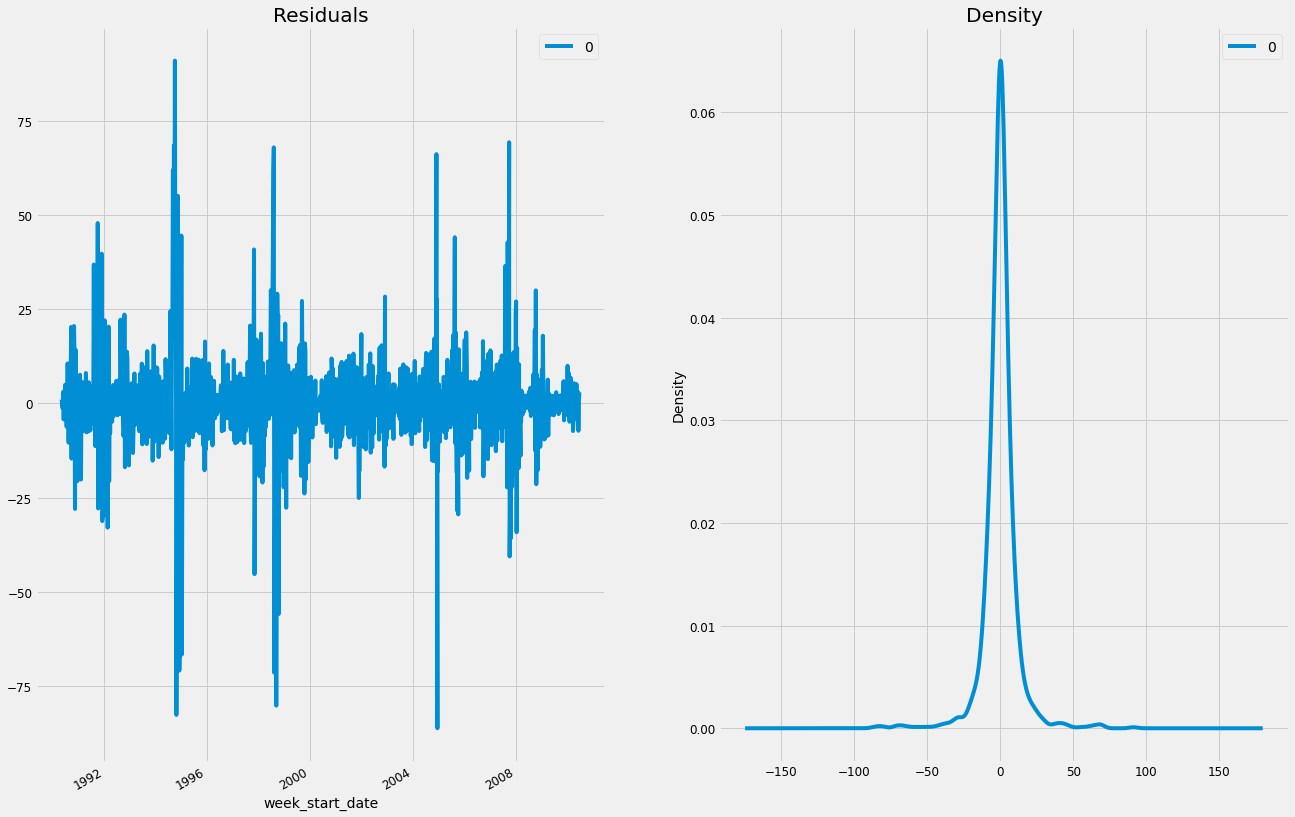

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(20,15))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

**Find the optimal ARIMA model using Out-of-Time Cross validation**

In [ ]:
df_sj.dtypes

total_cases    int64
dtype: object

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_sj.total_cases[:85].astype(float)
test = df_sj.total_cases[85:].astype(float)

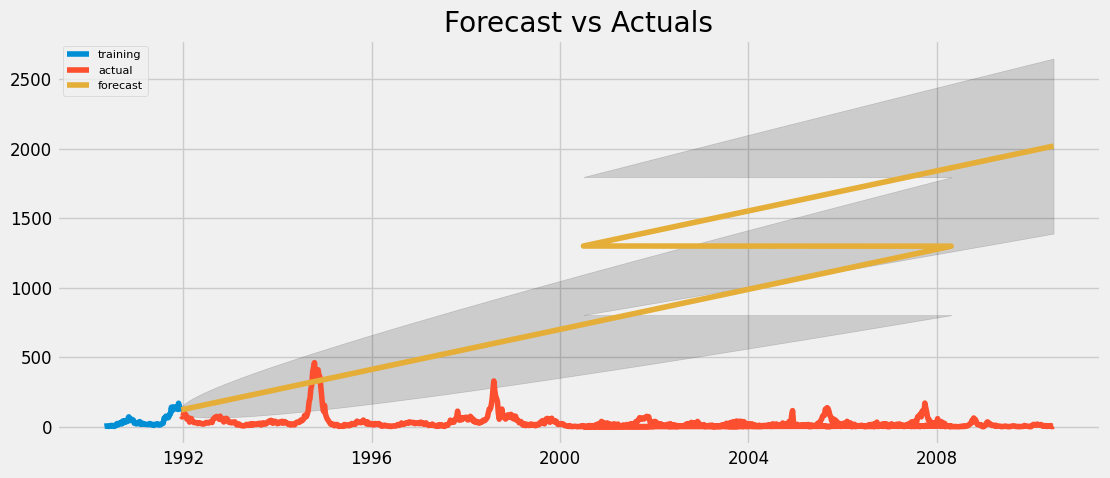

In [ ]:
# Build Model
 
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Using these two functions. we selected p=1 and q=2

                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -330.295
Method:                       css-mle   S.D. of innovations             12.336
Date:                Tue, 01 Mar 2022   AIC                            668.590
Time:                        09:34:49   BIC                            678.313
Sample:                             1   HQIC                           672.499
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3488      1.009      1.336      0.185      -0.630       3.327
ar.L1.D.total_cases    -0.2620      0.366     -0.715      0.477      -0.980       0.456
ma.L1.D.total_ca

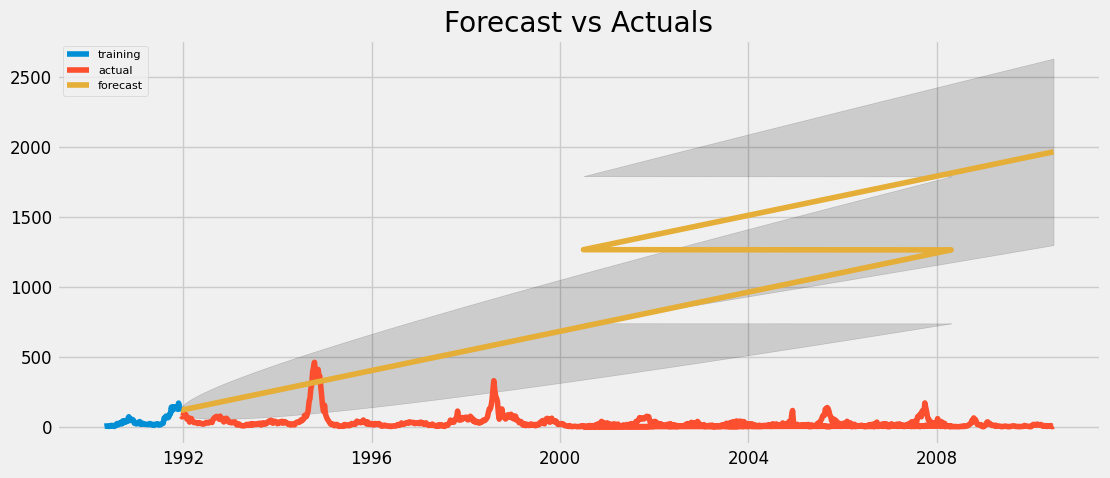

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**ARIMA IQ**

In [ ]:
df_iq = df[['week_start_date','total_cases']]

In [ ]:
df_iq = df_iq.set_index('week_start_date')


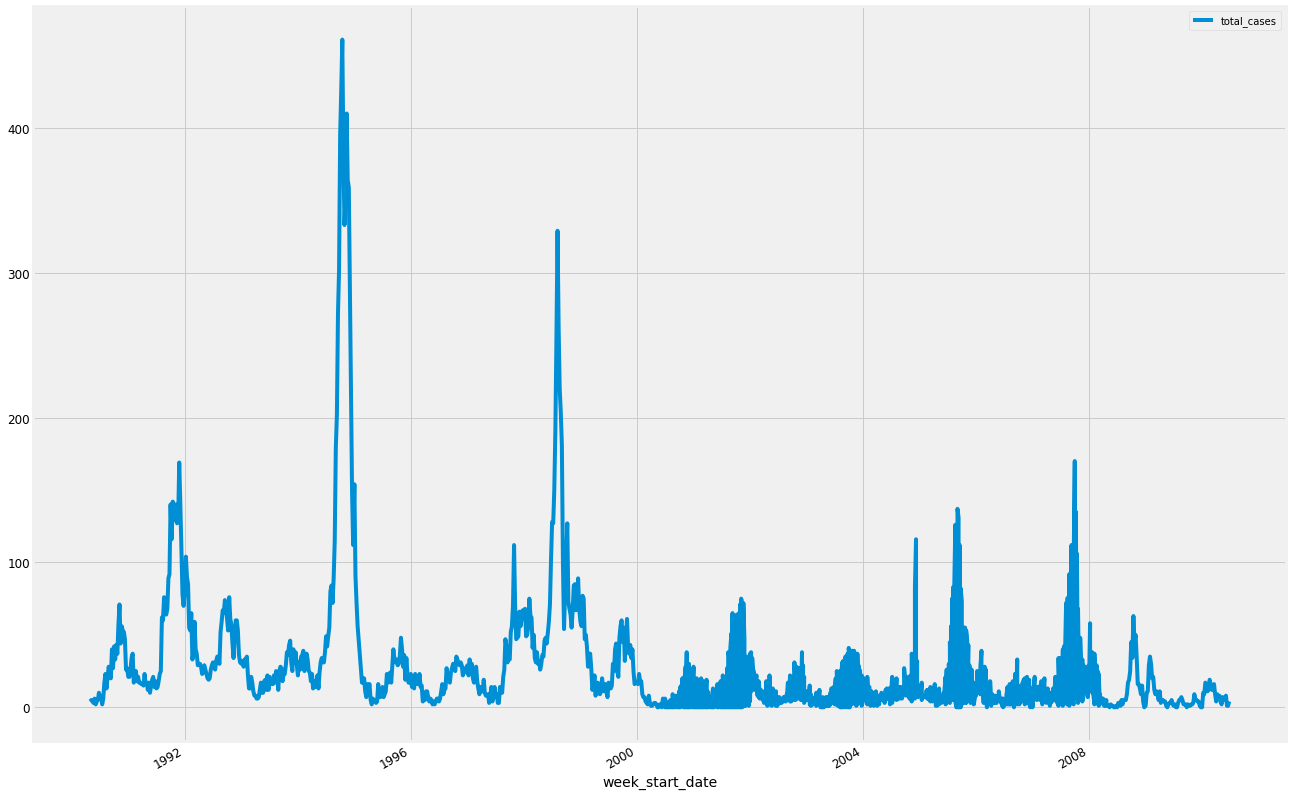

In [ ]:
df_iq.plot(figsize=(20, 15))

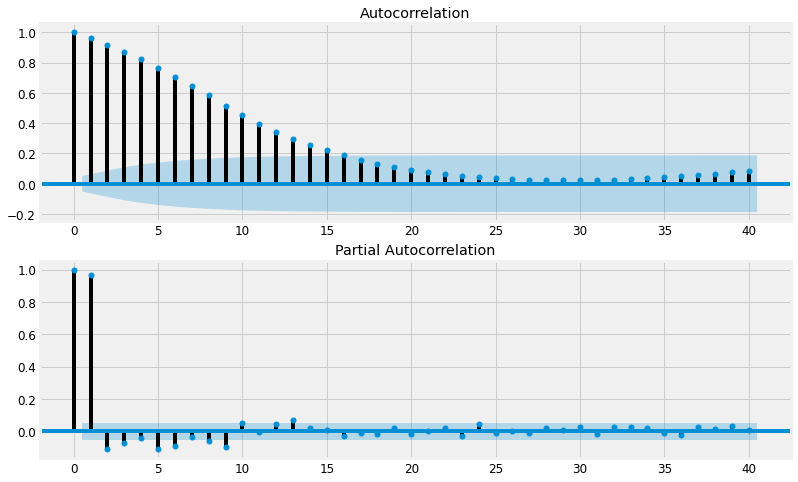

In [ ]:
#Checking for corelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_iq['total_cases'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_iq['total_cases'].dropna(),lags=40,ax=ax2)

#We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_iq.total_cases, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                 1455
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5651.251
Method:                       css-mle   S.D. of innovations             11.764
Date:                Tue, 01 Mar 2022   AIC                          11312.501
Time:                        09:34:53   BIC                          11338.915
Sample:                             1   HQIC                         11322.356
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0003      0.398      0.001      0.999      -0.779       0.779
ar.L1.D.total_cases     0.7302      0.105      6.979      0.000       0.525       0.935
ar.L2.D.total_ca

The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance)

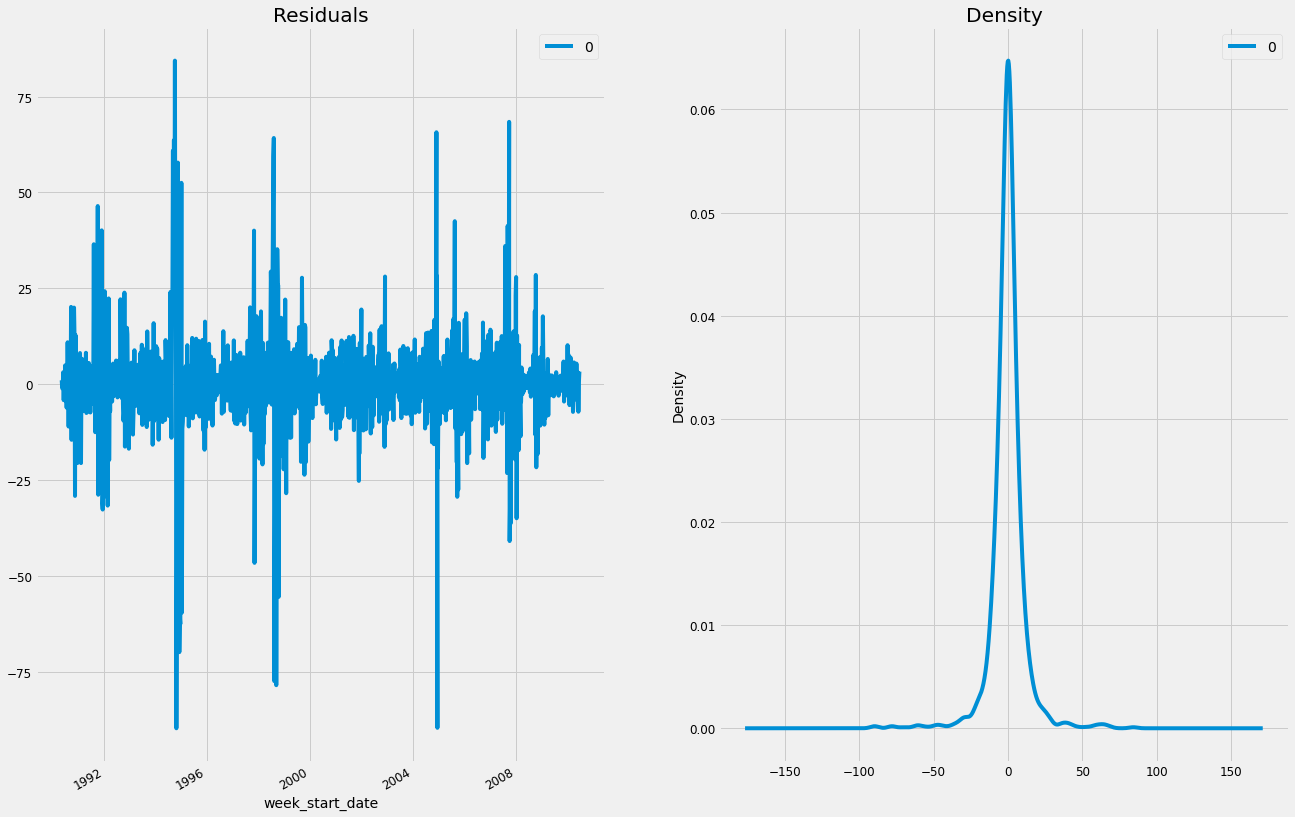

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(20,15))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Find the optimal ARIMA model using Out-of-Time Cross validation

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_iq.total_cases[:85]
test = df_iq.total_cases[85:]

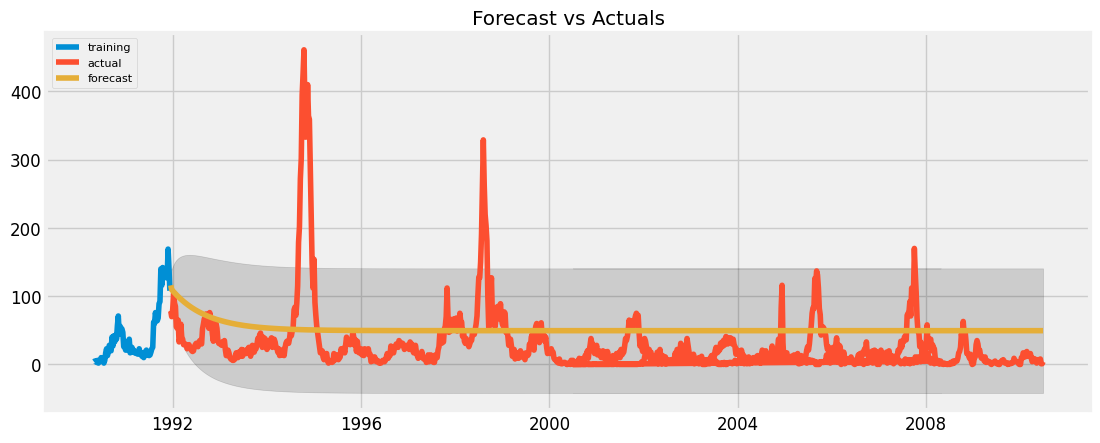

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

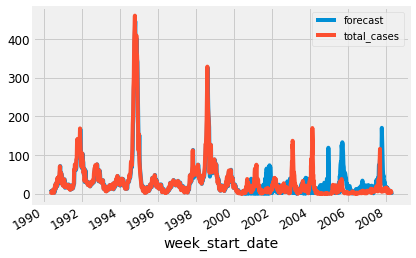

In [ ]:
# Plot Current model's predictions against actual on training data
# the trailing blue is predictions, but without including predictions in the model

model_fit.plot_predict(1,1200);

                              ARMA Model Results                              
Dep. Variable:            total_cases   No. Observations:                   85
Model:                     ARMA(1, 1)   Log Likelihood                -336.566
Method:                       css-mle   S.D. of innovations             12.482
Date:                Tue, 01 Mar 2022   AIC                            681.132
Time:                        13:50:19   BIC                            690.902
Sample:                             0   HQIC                           685.062
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.9331     36.448      1.425      0.158     -19.504     123.371
ar.L1.total_cases     0.9809      0.020     49.333      0.000       0.942       1.020
ma.L1.total_cases    -0.

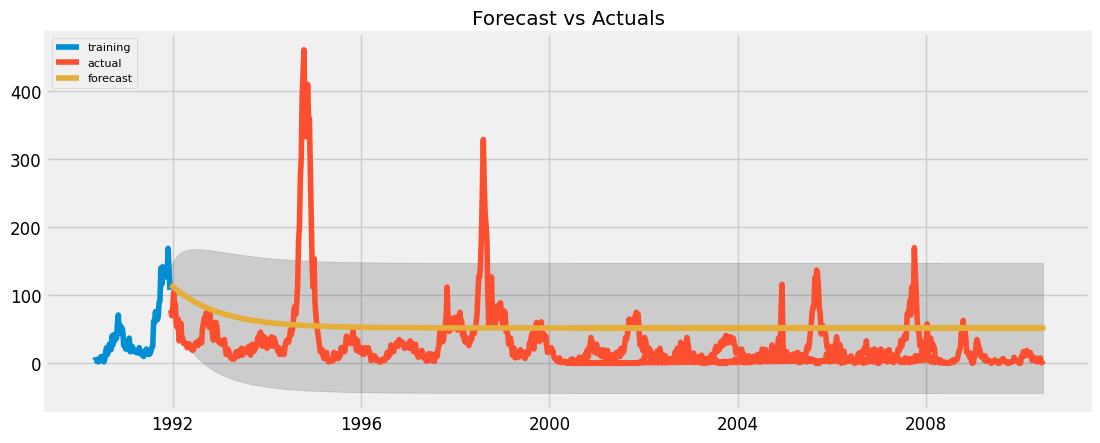

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(train, test):
    mape = np.mean(np.abs(train- test)/np.abs(test))  # MAPE
    me = np.mean(train - test)             # ME
    mae = np.mean(np.abs(train - test))    # MAE
    mpe = np.mean((train - test)/test)   # MPE
    rmse = np.mean((train - test)**2)**.5  # RMSE
    corr = np.corrcoef(train, test)[0,1]   # corr
    mins = np.amin(np.hstack([train[:,None], 
                              test[:,None]]), axis=1)
    maxs = np.amax(np.hstack([train[:,None], 
                              test[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.9975157275427893,
 'corr': -0.3353083388498833,
 'mae': 1021.7430129572065,
 'mape': inf,
 'me': 1020.857146100547,
 'minmax': 0.949403568370156,
 'mpe': inf,
 'rmse': 1160.3826043432757}

**FB PROPHET**

In [ ]:
#Importing the necessary libraries
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [ ]:
df_sj = df[['week_start_date','total_cases']]

In [ ]:
#Drop null values from month column.
#df_sj.dropna(subset = ["week_start_date"], inplace=True)

In [ ]:
#df_sj = df.set_index('week_start_date')

In [ ]:


#Setting the required columns since we only need date and total cases
X= df_sj['week_start_date']
y= df_sj['total_cases']

In [ ]:
#Setting our required columns to the required datestamp and target column
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X)
train_dataset['y']=y
train_dataset.head(2)

ds  y
0 1990-04-30  4
1 1990-05-07  5

In [ ]:
# Fitting the prophet in the dataset
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Making future predictions using Prophet
future= prophet_basic.make_future_dataframe(periods=52, freq='W')
future.tail(2)

ds
1099 2011-06-12
1100 2011-06-19

In [ ]:
#Getting the predicted values from the model
forecast=prophet_basic.predict(future)
forecast.head()

ds      trend  ...  multiplicative_terms_upper       yhat
0 1990-04-30  32.707313  ...                         0.0  16.032409
1 1990-05-07  32.816679  ...                         0.0  16.309515
2 1990-05-14  32.926045  ...                         0.0  16.739323
3 1990-05-21  33.035412  ...                         0.0  17.128139
4 1990-05-28  33.144778  ...                         0.0  17.592088

[5 rows x 16 columns]

In [ ]:
#Dropping the unnecesary output 
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

ds       yhat  yhat_lower  yhat_upper
0 1990-04-30  16.032409  -34.045542   65.023208
1 1990-05-07  16.309515  -32.748090   60.809889
2 1990-05-14  16.739323  -30.065384   64.102014
3 1990-05-21  17.128139  -31.674573   65.810363
4 1990-05-28  17.592088  -32.278546   65.753262

Text(0.5, 1.0, 'Forecast vs actual values')

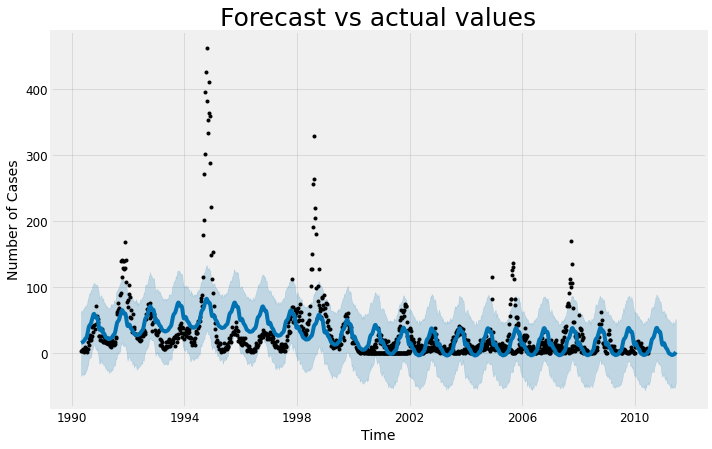

In [ ]:
#plotting The predicted values against the actual values
prophet_basic.plot(forecast,xlabel='Time',
                             ylabel='Number of Cases')
plt.title('Forecast vs actual values', size = 25)


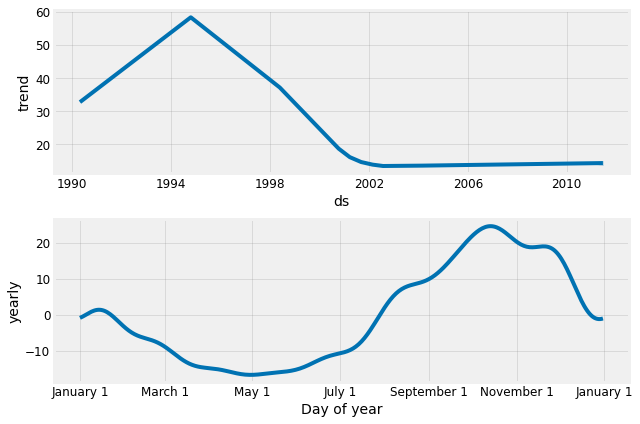

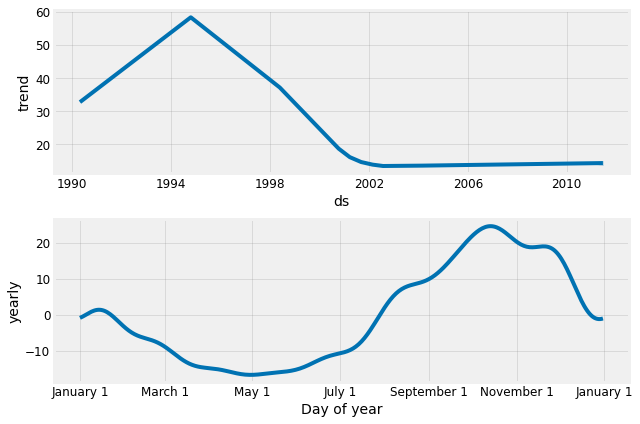

In [ ]:
#Checking the components of the predicted values
prophet_basic.plot_components(forecast)

Text(0.5, 1.0, 'Plot for changepoint along the years')

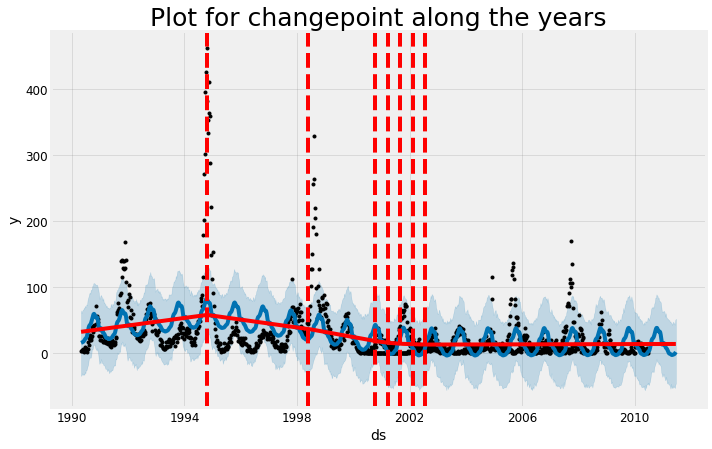

In [ ]:
#Finding the changepoints of the series
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)
plt.title('Plot for changepoint along the years', size =25)

In [ ]:
#Viewing some of the changepoints periods in the series
prophet_basic.changepoints

47     1991-03-26
93     1992-02-12
140    1993-01-08
186    1993-11-26
233    1994-10-22
279    1995-09-10
326    1996-08-05
372    1997-06-25
419    1998-05-21
465    1999-04-09
512    2000-03-04
558    2000-10-07
605    2001-03-26
651    2001-09-03
698    2002-02-12
744    2002-07-23
791    2003-01-08
837    2003-06-18
884    2003-11-26
930    2004-05-06
977    2004-10-21
1023   2005-04-02
1070   2005-09-10
1116   2006-02-19
1163   2006-08-06
Name: ds, dtype: datetime64[ns]

In [ ]:
#Creating a cutoff point so as to calculate its accuracy metrics
cutoffs = pd.to_datetime(['2004-01-03', '2004-07-03', '2005-01-01'])

In [ ]:
#Cross validating the predicted results in the cuttoff points and the actual values
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_basic, cutoffs=cutoffs, horizon='365 DAYS')


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#Finding the metrics of the predicted values
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae     mdape  coverage
0 40 days  138.902019  11.785670   9.700692  1.093214       1.0
1 42 days  144.457912  12.019065  10.048223  1.093214       1.0
2 47 days  139.395353  11.806581   9.745697  1.125585       1.0
3 49 days  146.770987  12.114908  10.130678  1.141930       1.0
4 54 days  170.780533  13.068303  10.998440  1.265634       1.0

In [ ]:
df_iq.head()

total_cases
week_start_date             
1990-04-30                 4
1990-05-07                 5
1990-05-14                 4
1990-05-21                 3
1990-05-28                 6

**CONCLUSIONS**

1) As the temperature increases in both cities the total number of cases increase too. Mosquitos Require a warm environment to breed which translates to increased cases recorded per week. As the temperature begins to drop the total cases drop too.

2) We note that as the precipitation amount increases along the year in both cities the total cases increase concurrently. Mosquitos Require water to lay their eggs, so as the amount of water in a surrounding increases we note increase in cases.

3) As humidity increases along the year between the two cities, the total number of cases increases. This can be tied to the fact that mosquitos require a humid environment to lay eggs and grow.

4) The  mean vegetation index in San Juan, Puerto Rico is steady along the year but drops towards the end of year, this is because the city is located along the coastline. The cases recorded along the weeks similarly drop towards that time. Mosquitos require a vegetation to live in and thus a drop in the vegetation around them leads to a drop in their numbers too.


5) The mean vegetation index of Iquitos, Peru seem to change over the year mainly because the the city is located inland and the vegetaion around it is affected by the amount of precipitation falling on the land. This index affects the cases recorded since as the vegetation increase the cases increase too.